In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import datetime

In [ ]:
df1 = pd.read_excel('/content/Question2-3.xlsx')

In [ ]:
df1.columns

Index(['tweetDate', 'content', 'twitterProfile', 'tweetUrl', 'timestamp',
       'query', 'label'],
      dtype='object')

In [ ]:
df1['content'].str.lower()

0         the electric vehicle scam explained \n#climate...
1         this lady was a supporter of green energy unti...
2         that just about sums it up.\n\n#climatescam ht...
3                      #climatescam https://t.co/x0msnuvuy0
4                      #climatescam https://t.co/3cdsxbyaeo
                                ...                        
275203    accela ceo @mauryblackman column on e-governme...
275204    #us #electriccars sales starting #chevrolet #v...
275205    charging stations on the rise in 2011: green m...
275206    #electriccars reporting some december sales ht...
275207    2011: the auto industry looks ahead http://ow....
Name: content, Length: 275208, dtype: object

In [ ]:
df2 = df1[df1['content'].str.contains(
    'climate change|climatescam|climate scam|climatehoax|climate hoax|renewable energy|sustainability|climate change|energyefficiency|renewableenergy',
    case=False,  # Case-insensitive search
    na=False     # Exclude rows with missing values
)]

# Print the filtered DataFrame
print(df2)


                             tweetDate  \
0       Fri Jul 28 10:36:34 +0000 2023   
1       Fri Jul 28 12:33:05 +0000 2023   
2       Fri Jul 28 21:55:42 +0000 2023   
3       Tue Jul 25 13:01:19 +0000 2023   
4       Tue Jul 25 17:20:38 +0000 2023   
...                                ...   
274380        2011-02-26T17:55:00.000Z   
274503        2011-02-15T13:53:00.000Z   
274570        2011-02-09T21:07:00.000Z   
274862        2011-01-15T13:53:00.000Z   
275153        2011-01-08T10:07:00.000Z   

                                                  content  \
0       The Electric Vehicle scam explained \n#Climate...   
1       This lady was a supporter of Green Energy unti...   
2       That just about sums it up.\n\n#ClimateScam ht...   
3                    #ClimateScam https://t.co/x0mSnuVUY0   
4                    #ClimateScam https://t.co/3CDsxbYAeO   
...                                                   ...   
274380  Watchdog says electric cars 'are as dirty as d...   
274503 

In [ ]:
columns_to_check_duplicates = ['content']
df2.drop_duplicates(subset=columns_to_check_duplicates, inplace=True)
df2.drop_duplicates(inplace=True)
df2.shape

<ipython-input-18-7f77ca234c96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(subset=columns_to_check_duplicates, inplace=True)
<ipython-input-18-7f77ca234c96>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(inplace=True)


(22048, 7)

In [ ]:
df2.dtypes

tweetDate         object
content           object
twitterProfile    object
tweetUrl          object
timestamp         object
query             object
label             object
dtype: object

In [ ]:
def format_tweet_date(timestamp_str):
    try:
        # Try parsing the first date format
        timestamp = datetime.datetime.strptime(timestamp_str, "%a %b %d %H:%M:%S %z %Y")
    except ValueError:
        try:
            # If the first format fails, try parsing the second date format
            timestamp = datetime.datetime.strptime(timestamp_str, "%Y-%m-%dT%H:%M:%S.%fZ")
        except ValueError:
            # If both formats fail, return the original string (or handle as needed)
            return timestamp_str

    formatted_date = timestamp.strftime("%d %b %Y")
    return formatted_date

# Apply the function to the 'tweetDate' column
df2['tweetDate'] = df2['tweetDate'].apply(format_tweet_date)

<ipython-input-20-90cdaaccd4d9>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['tweetDate'] = df2['tweetDate'].apply(format_tweet_date)


In [ ]:
#CHANGE THE DATA TYPES
data_types = {
    'tweetDate': 'datetime64',
    'content': 'string',
    'twitterProfile': 'string',
    'tweetUrl': 'string',
    'timestamp': 'datetime64',
    'query': 'string',
    #'label' : 'string'
}

# Convert columns to their respective data types
for col, dtype in data_types.items():
    df2[col] = df2[col].astype(dtype)

# Print the updated dataframe with the correct data types
print(df2.dtypes)

<ipython-input-21-b5180bbaa826>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = df2[col].astype(dtype)


tweetDate         datetime64[ns]
content                   string
twitterProfile            string
tweetUrl                  string
timestamp         datetime64[ns]
query                     string
label                     object
dtype: object


<ipython-input-21-b5180bbaa826>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = df2[col].astype(dtype)


In [ ]:
#adding the length of the content
df2['length'] = df2['content'].str.len()

<ipython-input-22-fde8a38bee87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['length'] = df2['content'].str.len()


In [ ]:
#descriptive analysis for content and username
string_columns = ['content', 'twitterProfile']
summary = df2[string_columns].describe()
print(summary)

                                                  content twitterProfile
count                                               22048          22048
unique                                              22048          10509
top     The Electric Vehicle scam explained \n#Climate...     @Zxcxz_xyz
freq                                                    1           3197


In [ ]:
df2.isnull().sum()

tweetDate             0
content               0
twitterProfile        0
tweetUrl            378
timestamp             0
query             11883
label             21920
length                0
dtype: int64

In [ ]:
# Assuming df is your DataFrame
columns_to_drop = ['tweetUrl', 'timestamp','query']
df2 = df2.drop(columns=columns_to_drop)

In [ ]:
column_name = 'content'  # Replace with the actual column name

# Drop rows with NaN values in the specified column
df2 = df2.dropna(subset=[column_name])

In [ ]:
df2.isnull().sum()

tweetDate             0
content               0
twitterProfile        0
label             21920
length                0
dtype: int64

In [ ]:
columns_to_check_duplicates = ['content']
df2.drop_duplicates(subset=columns_to_check_duplicates, inplace=True)
df2.drop_duplicates(inplace=True)

# Print the updated DataFrame
df2.shape

(22048, 5)

In [ ]:
#creating a day,month, year columns
df2['day']=df2['tweetDate'].dt.day
df2['month']=df2['tweetDate'].dt.month
df2['year']=df2['tweetDate'].dt.year
df2.sample(2)

tweetDate                                            content  \
12674 2023-08-07  Share your thoughts!

The mid-term evaluation ...   
22163 2023-08-14  Perhaps today's the day that #YYC's prime busi...   

       twitterProfile label  length  day  month  year  
12674  @LIFEprogramme   NaN     200    7      8  2023  
22163  @TweetsBentley   NaN     276   14      8  2023

In [ ]:
df2.rename(columns={'twitterProfile': 'Username'}, inplace=True)
df2.sample(2)

tweetDate                                            content  \
14000 2023-08-01  At theecoscheme.co.uk you can find out for fre...   
97556 2019-12-01  @TSOsolar presents a new concept of #carports ...   

           Username label  length  day  month  year  
14000  @ECOSCHEME22   NaN     246    1      8  2023  
97556     @TSOsolar   NaN     282    1     12  2019

In [ ]:
#Username Cleaning
def clean_username(username):
    if username.startswith('@'):
        return username[1:]  # Remove "@" symbol
    elif username.startswith('https://twitter.com/'):
        return username.split('/')[-1]  # Extract last part of URL
    else:
        return username

# Apply the clean_username function to the 'username' column
df2['Username'] = df2['Username'].apply(clean_username)

In [ ]:
df2.sample(4)

tweetDate                                            content  \
381    2023-08-01  OMG... I've just witnessed Global boiling
Ooop...   
18893  2014-05-30  We can stop Climate Change with Ocean Energy -...   
153428 2018-10-15  Porsche promises that the Taycan EV production...   
10457  2023-08-07  The US Government is literally retard... #Clim...   

               Username label  length  day  month  year  
381       David13353252   NaN     142    1      8  2023  
18893   ClimateChange00   NaN     126   30      5  2014  
153428    bellresources   NaN     282   15     10  2018  
10457     rycejohnson95   NaN     195    7      8  2023

In [ ]:
df2.shape

(22048, 8)

# VISUALISATION

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

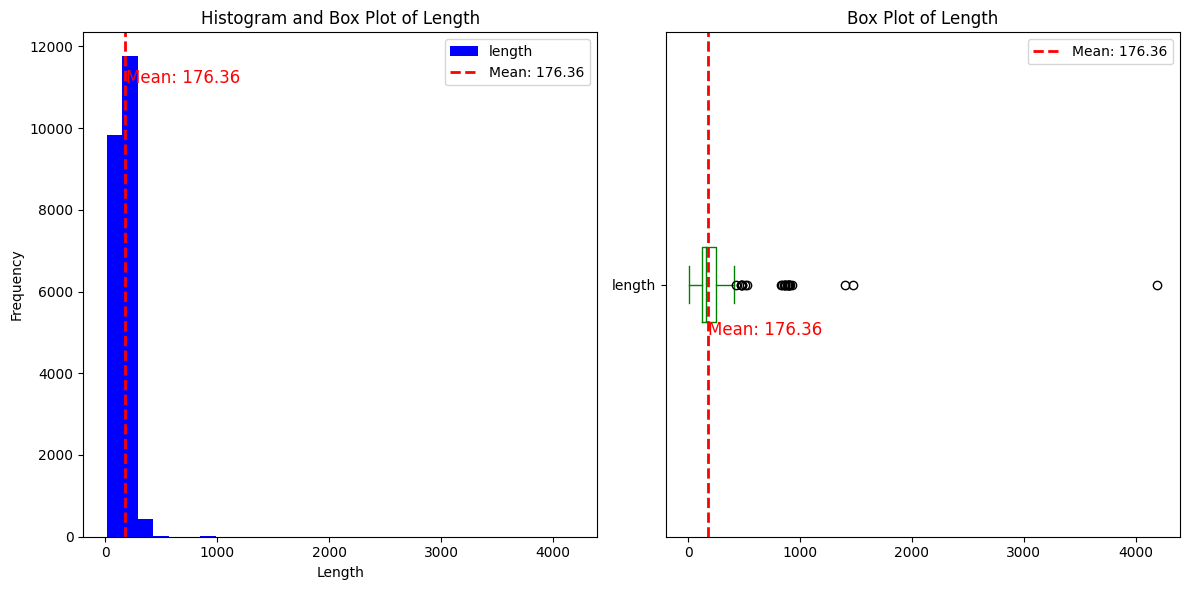

In [ ]:
# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# Add the histogram subplot
plt.subplot(1, 2, 1)
df2['length'].plot(kind='hist', bins=30, color='blue')
plt.title('Histogram and Box Plot of Length')
plt.xlabel('Length')
plt.ylabel('Frequency')

# Calculate the mean of the 'length' column
mean_length = df2['length'].mean()

# Add a vertical line at the mean value on the histogram subplot
plt.axvline(mean_length, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_length:.2f}')
plt.legend()

# Display the mean value as text on the histogram subplot
plt.text(mean_length + 10, plt.ylim()[1] * 0.9, f'Mean: {mean_length:.2f}', color='red', fontsize=12)

# Add the box plot subplot
plt.subplot(1, 2, 2)
df2['length'].plot(kind='box', vert=False, color='green')
plt.title('Box Plot of Length')

# Add a vertical line at the mean value on the box plot subplot
plt.axvline(mean_length, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_length:.2f}')
plt.legend()

# Display the mean value as text on the box plot subplot
plt.text(mean_length + 0.1, 0.9, f'Mean: {mean_length:.2f}', color='red', fontsize=12)

# Adjust layout
plt.tight_layout()


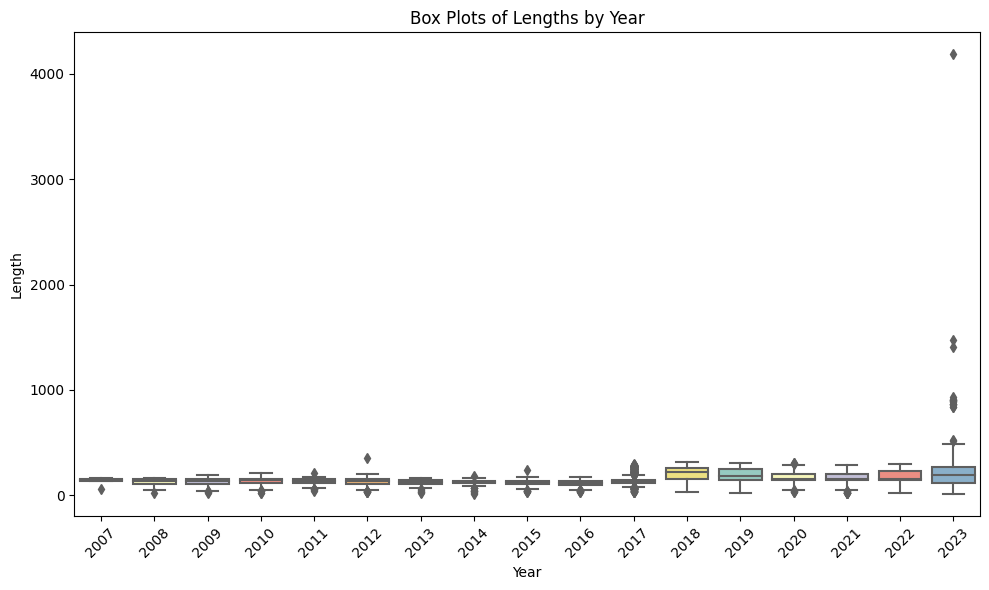

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='length', data=df2, palette='Set3')
plt.title('Box Plots of Lengths by Year')
plt.xlabel('Year')
plt.ylabel('Length')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

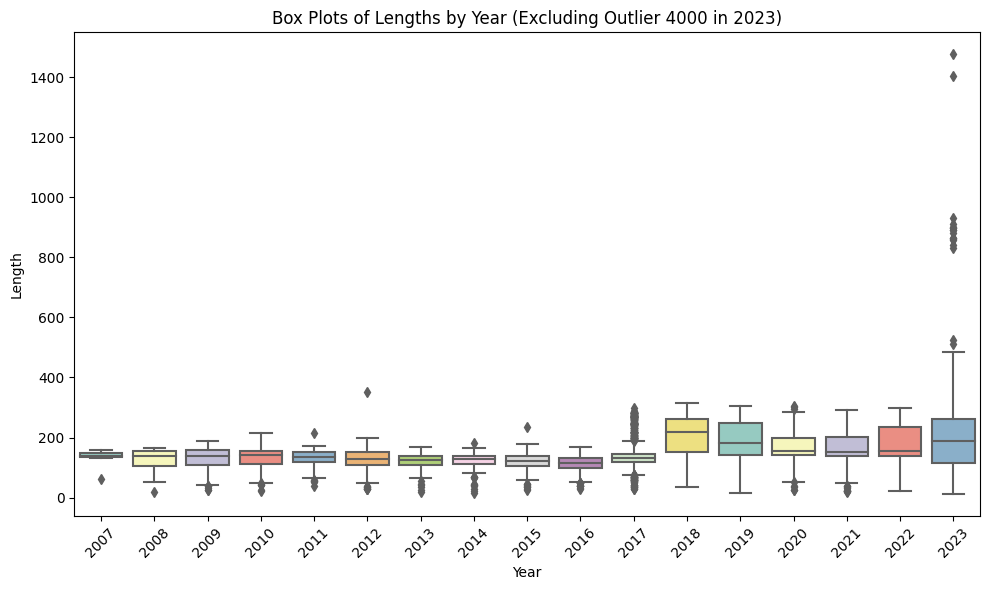

In [ ]:
# Filter the DataFrame to exclude outliers for the year 2023
filtered_df = df2[(df2['year'] != 2023) | (df2['length'] <= 4000)]

# Create the boxplot with the filtered DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='length', data=filtered_df, palette='Set3')
plt.title('Box Plots of Lengths by Year (Excluding Outlier 4000 in 2023)')
plt.xlabel('Year')
plt.ylabel('Length')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
#THE MOST TWEETED PROFILES
tweet_counts=df2['Username'].value_counts().head(10)
print(tweet_counts)

Zxcxz_xyz          3201
TonyClimate         513
LithiumConsol       323
EVNews6             211
evstationslocal     205
ElectricVNews       153
danielbastos        147
fiskeratiblog       138
WarWithTheDinos     131
topiclyev            89
Name: Username, dtype: int64


In [ ]:
username_counts = df2['Username'].value_counts().reset_index()

# Rename the columns
username_counts.columns = ['Username', 'Count']

# Display the new DataFrame
username_counts.head(10)

Username  Count
0        Zxcxz_xyz   3201
1      TonyClimate    513
2    LithiumConsol    323
3          EVNews6    211
4  evstationslocal    205
5    ElectricVNews    153
6     danielbastos    147
7    fiskeratiblog    138
8  WarWithTheDinos    131
9        topiclyev     89

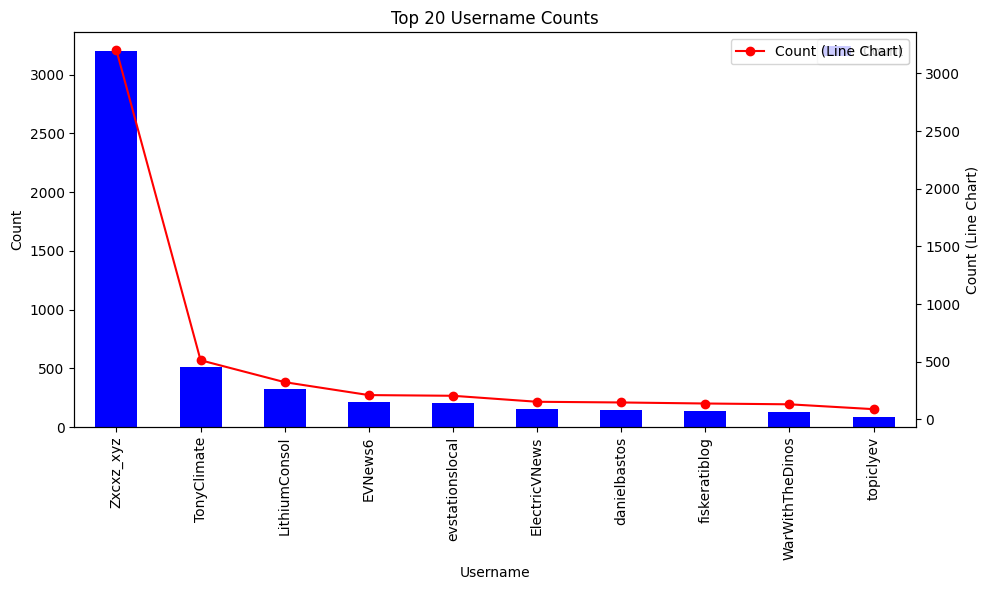

In [ ]:
top_20_username_counts = username_counts.sort_values(by='Count', ascending=False).head(10)

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart
top_20_username_counts.plot(kind='bar', x='Username', y='Count', color='blue', ax=ax1)

# Set labels and title for the bar chart
ax1.set_xlabel('Username')
ax1.set_ylabel('Count')
ax1.set_title('Top 20 Username Counts')

# Create a twin axis for the line chart
ax2 = ax1.twinx()

# Plot the line chart for the counts
top_20_username_counts.plot(kind='line', x='Username', y='Count', color='red', ax=ax2, marker='o')

# Set labels and title for the line chart
ax2.set_ylabel('Count (Line Chart)')
ax2.legend(['Count (Line Chart)'], loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
year_counts = df2['year'].value_counts().reset_index()

# Rename the columns
year_counts.columns = ['year', 'Count']

# Display the new DataFrame
year_counts

year  Count
0   2023   9412
1   2019   2310
2   2022   2201
3   2018   2184
4   2020   1325
5   2021   1249
6   2017   1130
7   2016    796
8   2015    373
9   2014    237
10  2013    182
11  2011    171
12  2009    166
13  2012    157
14  2010    115
15  2008     34
16  2007      6

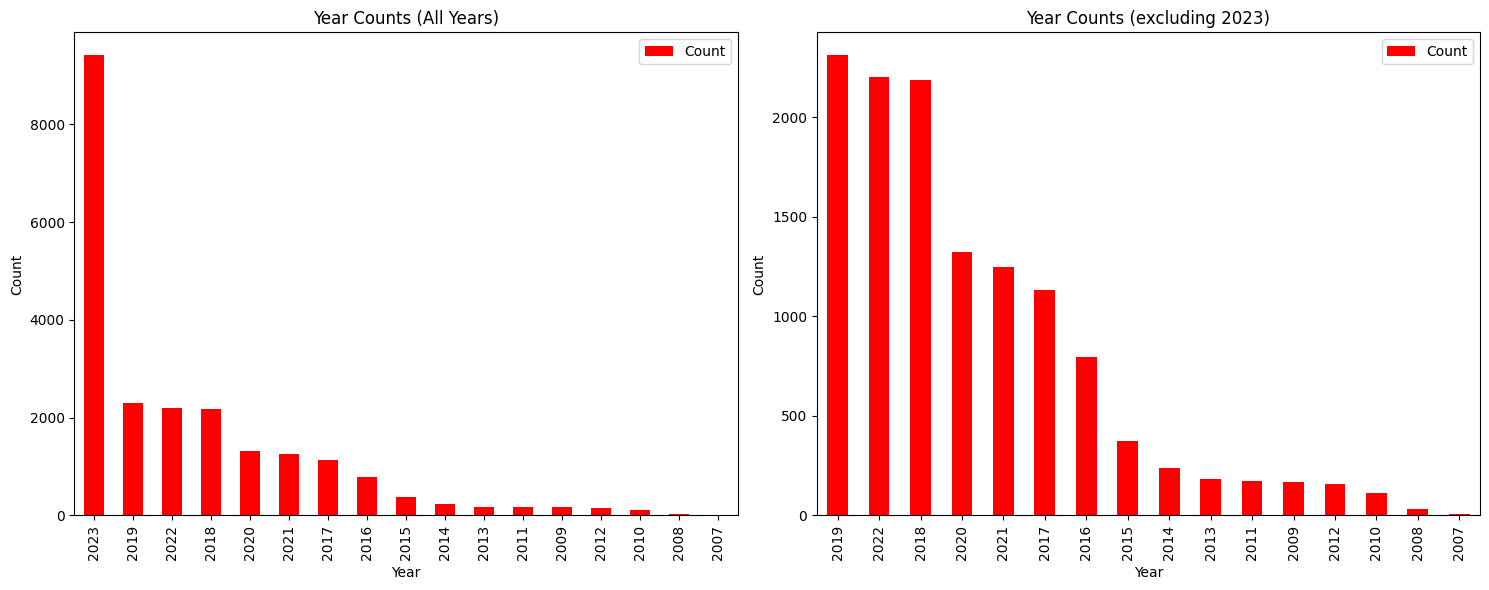

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot the bar chart for all years on the first subplot
year_counts.plot(kind='bar', x='year', y='Count', color='red', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Count')
ax1.set_title('Year Counts (All Years)')

# Filter data to exclude year 2023 for the second subplot
year_counts_without_2023 = year_counts[year_counts['year'] != 2023]

# Plot the bar chart excluding year 2023 on the second subplot
year_counts_without_2023.plot(kind='bar', x='year', y='Count', color='red', ax=ax2)
ax2.set_xlabel('Year')
ax2.set_ylabel('Count')
ax2.set_title('Year Counts (excluding 2023)')

# Adjust layout for subplots
plt.tight_layout()

# Show the plots
plt.show()

<ipython-input-48-c77c1093a1fe>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  year_counts_without_2023 = year_counts2[year_counts['year'] != 2023]


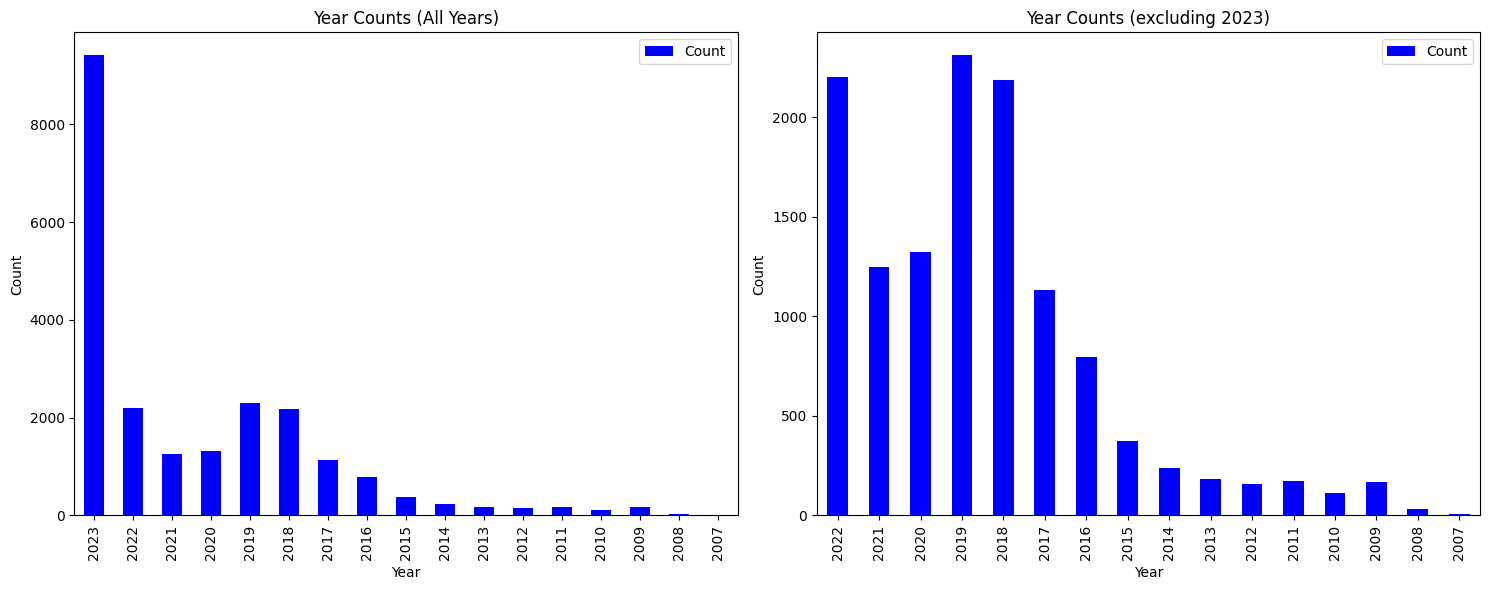

In [ ]:
year_counts2 = year_counts.sort_values(by='year', ascending=False)
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot the bar chart for all years on the first subplot
year_counts2.plot(kind='bar', x='year', y='Count', color='blue', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Count')
ax1.set_title('Year Counts (All Years)')

# Filter data to exclude year 2023 for the second subplot
year_counts_without_2023 = year_counts2[year_counts['year'] != 2023]

# Plot the bar chart excluding year 2023 on the second subplot
year_counts_without_2023.plot(kind='bar', x='year', y='Count', color='blue', ax=ax2)
ax2.set_xlabel('Year')
ax2.set_ylabel('Count')
ax2.set_title('Year Counts (excluding 2023)')

# Adjust layout for subplots
plt.tight_layout()

# Show the plots
plt.show()

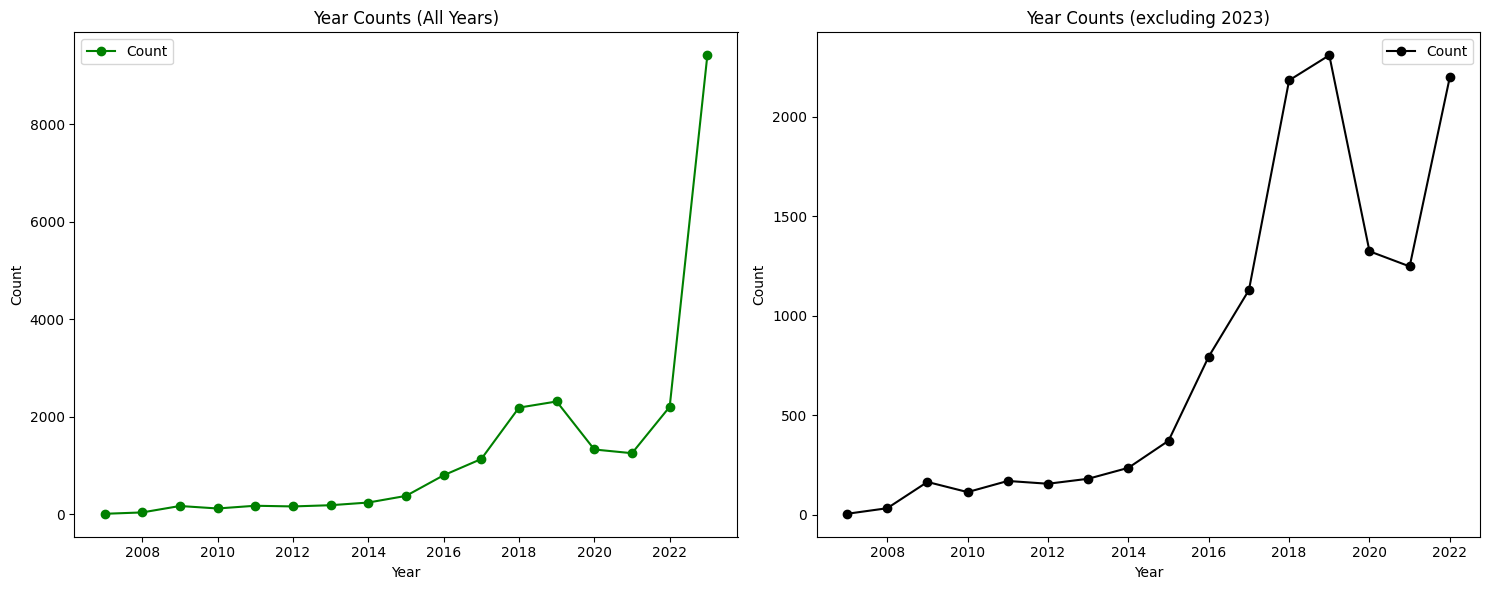

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot the line chart for all years on the first subplot
year_counts2.plot(kind='line', x='year', y='Count', color='green', marker='o', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Count')
ax1.set_title('Year Counts (All Years)')

# Plot the line chart excluding year 2023 on the second subplot
year_counts_without_2023.plot(kind='line', x='year', y='Count', color='black', marker='o', ax=ax2)
ax2.set_xlabel('Year')
ax2.set_ylabel('Count')
ax2.set_title('Year Counts (excluding 2023)')

# Adjust layout for subplots
plt.tight_layout()

# Show the plots
plt.show()

# IMPURITY

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import html
import spacy
import unicodedata
# Download stopwords (if not already downloaded)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def clean(Content):
    # convert html escapes like &amp; to characters.
    Content = html.unescape(Content)
    # tags like <tab>
    Content = re.sub(r'<[^<>]*>', ' ', Content)
    # markdown URLs like [Some text](https://....)
    Content = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', Content)
    # text or code in brackets like [0]
    Content = re.sub(r'\[[^\[\]]*\]', ' ', Content)
    # standalone sequences of specials, matches &# but not #cool
    Content = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', Content)
    # standalone sequences of hyphens like --- or ==
    Content = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', Content)
    # sequences of white spaces
    Content = re.sub(r'\s+', ' ', Content)
    # Remove URLs using a pattern that matches http and https URLs
    Content = re.sub(r'https?://\S+|www\.\S+', '', Content)
    return Content.strip()

# Apply the clean function to the 'text' column
df2['cleaned_text'] = df2['content'].apply(clean)

In [ ]:
def clean(Content):
    # convert html escapes like &amp; to characters.
    Content = html.unescape(Content)
    # tags like <tab>
    Content = re.sub(r'<[^<>]*>', ' ', Content)
    # markdown URLs like [Some text](https://....)
    Content = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', Content)
    # text or code in brackets like [0]
    Content = re.sub(r'\[[^\[\]]*\]', ' ', Content)
    # standalone sequences of specials, matches &# but not #cool
    Content = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', Content)
    # standalone sequences of hyphens like --- or ==
    Content = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', Content)
    # sequences of white spaces
    Content = re.sub(r'\s+', ' ', Content)
    # Remove URLs using a pattern that matches http and https URLs
    Content = re.sub(r'https?://\S+|www\.\S+', '', Content)
    # Remove standalone single alphabetic characters
    Content = re.sub(r'\b[a-zA-Z]\b', ' ', Content)
    return Content.strip()

# Apply the clean function to the 'Content' column
df2['cleaned_text'] = df2['content'].apply(clean)
# Print the cleaned text
print(df2['cleaned_text'])


0          The Electric Vehicle scam explained #ClimateScam
1         This lady was   supporter of Green Energy unti...
2                  That just about sums it up. #ClimateScam
3                                              #ClimateScam
4                                              #ClimateScam
                                ...                        
274380    Watchdog says electric cars 'are as dirty as d...
274503    #ElectricCars gain traction amid push for #sus...
274570    #Lithium Drive: #Mercedes and road of sustaina...
274862    Just added myself to the  twitter directory un...
275153    Just added myself to the  twitter directory un...
Name: cleaned_text, Length: 22048, dtype: object


In [ ]:
def clean(Content):
    # Convert html escapes like &amp; to characters.
    Content = html.unescape(Content)
    # Remove emojis and special characters (except #)
    Content = re.sub(r'[^\w\s#]', ' ', Content)  # This pattern keeps #
    # Remove URLs using a pattern that matches http and https URLs
    Content = re.sub(r'https?://\S+|www\.\S+', '', Content)
    # Remove extra white spaces
    Content = re.sub(r'\s+', ' ', Content)
    return Content.strip()


# Apply the clean function to the 'Content' column
df2['cleaned_text'] = df2['cleaned_text'].apply(clean)

In [ ]:
df2['cleaned_text'].sample(2)

80250    Looking forward to renewed interest in #energy...
13251    Introducing the VUE 34x from NLS Lighting the ...
Name: cleaned_text, dtype: string

In [ ]:
#change the data type of cleaned text column.
df2['cleaned_text'] = df2['cleaned_text'].astype('string')
df2.dtypes

tweetDate       datetime64[ns]
content                 string
Username                object
label                   object
length                   Int64
day                      int64
month                    int64
year                     int64
cleaned_text            string
dtype: object

In [ ]:
# Function to clean text
def clean_text(text):
    if isinstance(text, str):
        # Remove numbers
        text = re.sub(r'\d+', '', text)

        # Remove special characters like üíµ
        text = re.sub(r'[üíµ]', '', text)

    return text

# Apply the clean_text function to the 'processed_docs' column
df2['cleaned_text'] = df2['cleaned_text'].apply(clean_text)

In [ ]:
# Function to clean text
def clean_text(text):
    if isinstance(text, str):
        # Remove 'ü' character
        text = text.replace('ü', '').replace('ö', '').replace('ô', '')

    return text

# Apply the clean_text function to the 'processed_docs' column
df2['cleaned_text'] = df2['cleaned_text'].apply(clean_text)

In [ ]:
# Function to clean text
def clean_text(text):
    if isinstance(text, str):
        # Remove 'å', 'ô', 'ÿ', and 'ä' characters
        text = text.replace('å', '').replace('ô', '').replace('ÿ', '').replace('ä', '')

    return text

# Apply the clean_text function to the 'processed_docs' column
df2['cleaned_text'] = df2['cleaned_text'].apply(clean_text)

In [ ]:
df2['cleaned_text'] = df2['cleaned_text'].str.lower()

In [ ]:
#########CALCULATE IMPURITY FOR TEXT AND CLEANED_TEXT COLUMNS#############
# List of columns you want to keep in the new DataFrame
columns_to_keep = ['content', 'cleaned_text']

# Create the new DataFrame with selected columns
new_df = df2[columns_to_keep].copy()

# Perform any further operations on the new DataFrame
# For example, calculate impurity and add it as a new column
def calculate_impurity(Content):
    total_chars = len(Content)
    if total_chars == 0:
        return 0  # Return 0 impurity for empty strings
    non_alphanumeric_chars = sum(not c.isalnum() for c in Content)
    impurity_percentage = (non_alphanumeric_chars / total_chars) * 100
    return impurity_percentage

new_df['cleaned_impurity_percentage'] = new_df['cleaned_text'].apply(calculate_impurity)
new_df['impurity_percentage'] = new_df['content'].apply(calculate_impurity)

In [ ]:
new_df

content  \
0       The Electric Vehicle scam explained 
#ClimateS...   
1       This lady was a supporter of Green Energy unti...   
2       That just about sums it up.

#ClimateScam http...   
3                    #ClimateScam https://t.co/x0mSnuVUY0   
4                    #ClimateScam https://t.co/3CDsxbYAeO   
...                                                   ...   
274380  Watchdog says electric cars 'are as dirty as d...   
274503  #ElectricCars gain traction amid push for #sus...   
274570  #Lithium Drive: #Mercedes and road of sustaina...   
274862  Just added myself to the http://wefollow.com t...   
275153  Just added myself to the http://wefollow.com t...   

                                             cleaned_text  \
0        the electric vehicle scam explained #climatescam   
1       this lady was supporter of green energy until ...   
2                 that just about sums it up #climatescam   
3                                            #climatescam   
4                                            #climatescam   
...                                                   ...   
274380  watchdog says electric cars are as dirty as di...   
274503  #electriccars gain traction amid push for #sus...   
274570  #lithium drive #mercedes and road of sustainab...   
274862  just added myself to the twitter directory und...   
275153  just added myself to the twitter directory und...   

        cleaned_impurity_percentage  impurity_percentage  
0                         12.500000            17.808219  
1                         19.886364            23.478261  
2                         17.948718            23.076923  
3                          8.333333            19.444444  
4                          8.333333            19.444444  
...                             ...                  ...  
274380                    18.000000            21.138211  
274503                    14.141414            17.355372  
274570                    17.796610            20.000000  
274862                    16.239316            18.705036  
275153                    15.384615            17.985612  

[22048 rows x 4 columns]

# CHARACTER NORMALISATION AND PATTERN-BASED DATA MASKING

In [ ]:
import sys
!{sys.executable} -m pip install textacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.3/320.3 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.9 MB/s eta 0:00:00


In [ ]:
import textacy.preprocessing as tprep
def normalize(cleaned_text):
    cleaned_text = tprep.normalize_hyphenated_words(cleaned_text)
    cleaned_text = tprep.normalize_quotation_marks(cleaned_text)
    cleaned_text = tprep.normalize_unicode(cleaned_text)
    cleaned_text = tprep.remove_accents(cleaned_text)
    return cleaned_text

In [ ]:
#cleaning the @'s
def clean_text(cleaned_text):
    # Remove Twitter mentions (e.g., @Rainbow6es, @CreamRealBetis, @eMonkeyzClub)
    cleaned_text = re.sub(r'@\w+', '', cleaned_text)

    # Remove any leading or trailing spaces
    cleaned_text = cleaned_text.strip()

    return cleaned_text
df2['cleaned_text'] = df2['cleaned_text'].apply(clean_text)
print(df2['cleaned_text'])

0          the electric vehicle scam explained #climatescam
1         this lady was supporter of green energy until ...
2                   that just about sums it up #climatescam
3                                              #climatescam
4                                              #climatescam
                                ...                        
274380    watchdog says electric cars are as dirty as di...
274503    #electriccars gain traction amid push for #sus...
274570    #lithium drive #mercedes and road of sustainab...
274862    just added myself to the twitter directory und...
275153    just added myself to the twitter directory und...
Name: cleaned_text, Length: 22048, dtype: object


# TOKENISATION

In [ ]:
RE_TOKEN = re.compile(r"""
               ( [#]?[@\w'â\.\-\:]*\w     # words, hashtags and email addresses
               | [:;<]\-?[\)\(3]          # coarse pattern for basic text emojis
               | [\U0001F100-\U0001FFFF]  # coarse code range for unicode emojis
               )
               """, re.VERBOSE)

def tokenize(cleaned_text):
    return RE_TOKEN.findall(cleaned_text)

tokens = df2['cleaned_text'].apply(tokenize)

# Print the tokens
for token_list in tokens:
    print(*token_list, sep='|')

Görüntülenen çıkış son 5000 satıra kısaltıldı.
the|urgent|need|to|cut|#co|#emissions|to|secure|the|future|of|our|planet|is|clear|but|there|are|huge|implications|for|our|#naturalresources|not|only|to|produce|green|#technologies|like|#electriccars|but|keep|them|charged|treehugger|com|cars|why|elec|#earth|#sustainability
local|event|highlights|energy|production|conservation|efforts|po|st|tyuup|#tcnn|#electricvehicles|#renewableenergy|#renewables
germany|electric|highway|that|charges|trucks|as|they|drive|#electricvehicles|#sustainability
charging|an|electric|car|in|america|is|about|to|get|little|less|painful|tcrn|ch|mknoow|#renewableenergy|#asx|#solarpower|#solarenergy|#electriccars
long|distance|electric|buses|are|coming|to|the|#green|#electricvehicles|#sustainability|#environment|#empowerment|fastcompany|com|lon
innovative|renewable|energy|products|on|show|po|st|isijcs|#tcnn|#electricvehicles|#renewableenergy
fantastic|news|that|tesla|are|bringing|in|vegan|cars|from|next|year|#vegan|#car

In [ ]:
from spacy.tokenizer import Tokenizer
from spacy.util import compile_prefix_regex, \
                       compile_infix_regex, compile_suffix_regex

def custom_tokenizer(nlp):

    # use default patterns except the ones matched by re.search
    prefixes = [pattern for pattern in nlp.Defaults.prefixes
                if pattern not in ['-', '_', '#']]
    suffixes = [pattern for pattern in nlp.Defaults.suffixes
                if pattern not in ['_']]
    infixes  = [pattern for pattern in nlp.Defaults.infixes
                if not re.search(pattern, 'xx-xx')]

    return Tokenizer(vocab          = nlp.vocab,
                     rules          = nlp.Defaults.tokenizer_exceptions,
                     prefix_search  = compile_prefix_regex(prefixes).search,
                     suffix_search  = compile_suffix_regex(suffixes).search,
                     infix_finditer = compile_infix_regex(infixes).finditer,
                     token_match    = nlp.Defaults.token_match)

# Load the 'en_core_web_sm' model from spaCy
nlp = spacy.load('en_core_web_sm')

# Replace the tokenizer with your custom tokenizer
nlp.tokenizer = custom_tokenizer(nlp)

# Function to process text with spaCy and return the result
def process_text(text):
    doc = nlp(text)
    return doc

# Apply the processing function to the entire 'cleaned_text' column
df2['processed_docs'] = df2['cleaned_text'].apply(lambda x: process_text(x))

# Iterate through each sentence in the 'processed_docs' column
for doc in df2['processed_docs']:
    for token in doc:
        print(token, end="|")
    print()  # Print a new line after processing each sentence

Görüntülenen çıkış son 5000 satıra kısaltıldı.
the|urgent|need|to|cut|#co|#emissions|to|secure|the|future|of|our|planet|is|clear|but|there|are|huge|implications|for|our|#naturalresources|not|only|to|produce|green|#technologies|like|#electriccars|but|keep|them|charged|treehugger|com|cars|why|elec|#earth|#sustainability|
local|event|highlights|energy|production|conservation|efforts|po|st|tyuup|#tcnn|#electricvehicles|#renewableenergy|#renewables|
germany|electric|highway|that|charges|trucks|as|they|drive|#electricvehicles|#sustainability|
charging|an|electric|car|in|america|is|about|to|get|little|less|painful|tcrn|ch|mknoow|#renewableenergy|#asx|#solarpower|#solarenergy|#electriccars|
long|distance|electric|buses|are|coming|to|the|#green|#electricvehicles|#sustainability|#environment|#empowerment|fastcompany|com| |lon|
innovative|renewable|energy|products|on|show|po|st|isijcs|#tcnn|#electricvehicles|#renewableenergy|
fantastic|news|that|tesla|are|bringing|in|vegan|cars|from|next|year|#ve

# LINGUISTIC PROCESSING

In [ ]:
nlp = spacy.load('en_core_web_sm', enable=['parser', 'ner'])

In [ ]:
nlp.pipeline

[('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7c5165dabca0>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7c5165daa1f0>)]

In [ ]:
def process_text(text):
    doc = nlp(text)
    return doc

# Apply the processing function to the entire 'cleaned_text' column
df2['processed_docs'] = df2['cleaned_text'].apply(process_text)

# Now you have a new column 'processed_docs' in your DataFrame containing the processed documents
# You can access and work with the processed documents as needed
for doc in df2['processed_docs']:
    for token in doc:
        print(token.text, token.pos_, token.dep_)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
so  conj
electric  conj
cars  conj
can  conj
come  conj
top  conj
up  conj
aren  conj
we  conj
green  conj
#  conj
renewableenergy  conj
#  conj
electriccars  punct
harley  compound
davidson  ROOT
rolls  pobj
out  conj
project  conj
livewire  conj
electric  conj
motorbike  conj
ow  conj
ly  conj
yvhn  conj
#  conj
harleydavidson  conj
#  conj
electriccars  conj
#  conj
sustainability  punct
gov  compound
seeks  ROOT
to  pobj
spur  conj
employers  conj
to  conj
install  conj
charging  conj
stations  conj
for  conj
#  conj
electriccars  conj
ow  conj
ly  conj
yte  conj
#  conj
sustainability  punct
elon  compound
musk  ROOT
gives  pobj
tesla  conj
patents  conj
to  conj
open  conj
source  conj
movement  conj
#  conj
opensource  conj
#  conj
electriccars  conj
#  conj
ageofsustainability  punct
tesla  compound
all  ROOT
our  pobj
patents  conj
belong  conj
to  conj
you  conj
#  conj
sustainability  conj
#  conj
electriccars  conj
#  conj
detr

In [ ]:
def display_nlp(doc, include_punct=False):
    """Generate data frame for visualization of spaCy tokens."""
    rows = []
    for i, t in enumerate(doc):
        if not t.is_punct or include_punct:
            row = {'token': i,  'text': t.text, 'lemma_': t.lemma_,
                   'is_stop': t.is_stop, 'is_alpha': t.is_alpha,
                   'pos_': t.pos_, 'dep_': t.dep_,
                   'ent_type_': t.ent_type_, 'ent_iob_': t.ent_iob_}
            rows.append(row)

    df2 = pd.DataFrame(rows).set_index('token')
    df2.index.name = None
    return df2

In [ ]:
# Select the specific row you want to analyze
doc_text = df2['processed_docs'].iloc[2]

# Process the selected text with spaCy
doc = nlp(doc_text)

# Call the display_nlp function to generate the DataFrame
result_df = display_nlp(doc)

# Print the result DataFrame
print(result_df)

          text lemma_  is_stop  is_alpha pos_      dep_ ent_type_ ent_iob_
0         that            True      True       compound                  O
1         just            True      True           ROOT                  O
2        about            True      True           pobj                  O
3         sums           False      True           conj                  O
4           it            True      True           conj                  O
5           up            True      True           conj                  O
7  climatescam           False      True          punct                  O


# STOP WORDS

In [ ]:
# Function to remove stop words from a doc
def remove_stop_words(doc):
    return [token.text for token in doc if not token.is_stop]
# Replace the tokenizer with your custom tokenizer
nlp.tokenizer = custom_tokenizer(nlp)
df2['processed_docs'] = df2['cleaned_text'].apply(lambda x: remove_stop_words(nlp(x)))

# Print the result
df2.sample(1)

tweetDate                                            content Username  \
1643 2023-07-28  As an Aussie of Greek decent, who has big exte...   JP__75   

     label  length  day  month  year  \
1643   NaN     291   28      7  2023   

                                           cleaned_text  \
1643  as an aussie of greek decent who has big exten...   

                                         processed_docs  
1643  [aussie, greek, decent, big, extended, family,...

# LEMMA EXTRACTION BASED ON POS

In [ ]:
import textacy

In [ ]:
#BOTH
nlp = spacy.load('en_core_web_sm')

# Function to extract lemmas from a text using textacy
def extract_lemmas(text, include_pos=['ADJ', 'NOUN']):
    doc = nlp(text)
    lemmas = textacy.extract.words(doc, filter_stops=True, filter_punct=True,
                                   filter_nums=True, include_pos=include_pos,
                                   exclude_pos=None, min_freq=1)
    return [t.lemma_ for t in lemmas]

# Assuming you have a DataFrame called 'df' with a column 'cleaned_text'
# Apply the function to the 'cleaned_text' column and store the results in a new column 'lemmas2'
df2['lemmas_BOTH'] = df2['cleaned_text'].apply(extract_lemmas, include_pos=['ADJ', 'NOUN'])

# Print the DataFrame with lemmatized words
df2.sample(2)

tweetDate                                            content  \
133777 2018-10-30  The future electric car could be one giant bat...   
261866 2013-07-25  CMP offers $15K grants to buy or lease plug-in...   

             Username label  length  day  month  year  \
133777  LithiumConsol   NaN     126   30     10  2018   
261866      BerryDunn   NaN     130   25      7  2013   

                                             cleaned_text  \
133777  the future electric car could be one giant bat...   
261866  cmp offers k grants to buy or lease plug in ca...   

                                           processed_docs  \
133777  [future, electric, car, giant, battery, bit, l...   
261866  [cmp, offers, k, grants, buy, lease, plug, car...   

                                              lemmas_BOTH  
133777  [future, electric, car, giant, battery, bit, a...  
261866  [grant, plug, car, biz, biz, article, sustaina...

In [ ]:
df2[['content', 'cleaned_text', 'processed_docs', 'lemmas_BOTH']].iloc[22]

content           You‚Äôve got to love the ignorance, &amp; the ...
cleaned_text      you äve got to love the ignorance the hypocris...
processed_docs    [äve, got, love, ignorance, hypocrisy,  , èª, ...
lemmas_BOTH                     [ignorance, hypocrisy, climatecult]
Name: 22, dtype: object

In [ ]:
df2['content'].iloc[22]

'You‚Äôve got to love the ignorance, &amp; the hypocrisy \uf8ffü§¶\uf8ffüèª‚Äç‚ôÇÔ∏è\uf8ffü§¶\uf8ffüèª‚Äç‚ôÇÔ∏è\uf8ffü§Ø\n\n\uf8ffü§£\uf8ffü§£\uf8ffü§£\uf8ffü§£\uf8ffü§£\uf8ffü§£\uf8ffü§£\uf8ffü§£\uf8ffü§£\uf8ffü§£#ClimateScam #ClimateCult https://t.co/nKOeZvoWGl'

In [ ]:
df2['cleaned_text'].iloc[22]

'you äve got to love the ignorance the hypocrisy  èª äç çô è  èª äç çô è  ø           #climatescam #climatecult'

In [ ]:
df2['processed_docs'].iloc[22]

['äve',
 'got',
 'love',
 'ignorance',
 'hypocrisy',
 ' ',
 'èª',
 'äç',
 'çô',
 'è',
 ' ',
 'èª',
 'äç',
 'çô',
 'è',
 ' ',
 'ø',
 '          ',
 '#climatescam',
 '#climatecult']

In [ ]:
df2['lemmas_BOTH'].iloc[22]

['ignorance', 'hypocrisy', 'climatecult']

# LDA

In [ ]:
from gensim import corpora, models
from gensim.models import CoherenceModel

In [ ]:
# Create a Gensim Dictionary and Corpus
dictionary = corpora.Dictionary(df2['lemmas_BOTH'])
corpus = [dictionary.doc2bow(doc) for doc in df2['lemmas_BOTH']]

# Train the LDA model
num_topics = 10
passes = 10
lda_model = models.LdaModel(corpus, id2word=dictionary, num_topics=num_topics, passes=passes)

# Print the top words for each topic
topics = lda_model.show_topics(num_topics=num_topics, num_words=10)
for topic in topics:
    print(topic)

# Assign topics to documents
document_topics = [lda_model.get_document_topics(doc) for doc in corpus]


(0, '0.083*"credit" + 0.064*"technology" + 0.048*"tech" + 0.024*"automotive" + 0.023*"tax" + 0.022*"air" + 0.020*"project" + 0.016*"company" + 0.016*"quality" + 0.014*"highway"')
(1, '0.071*"sale" + 0.035*"complete" + 0.032*"localfood" + 0.032*"metrogreenscene" + 0.032*"lecture" + 0.021*"network" + 0.020*"utility" + 0.017*"detail" + 0.015*"key" + 0.015*"growth"')
(2, '0.052*"hydrogen" + 0.028*"day" + 0.028*"home" + 0.023*"climatecrisis" + 0.020*"climateaction" + 0.017*"smart" + 0.013*"climatescam" + 0.013*"climateemergency" + 0.012*"theansweriswater" + 0.011*"building"')
(3, '0.172*"sustainability" + 0.040*"bit" + 0.038*"electricvehicle" + 0.036*"energy" + 0.030*"future" + 0.029*"energyefficiency" + 0.026*"green" + 0.014*"transportation" + 0.013*"innovation" + 0.013*"article"')
(4, '0.147*"renewableenergy" + 0.101*"renewable" + 0.093*"tesla" + 0.091*"ev" + 0.068*"ift" + 0.021*"electric" + 0.018*"model" + 0.015*"car" + 0.015*"new" + 0.010*"evnew"')
(5, '0.070*"image" + 0.065*"cleanenerg

In [ ]:
# Calculate coherence score
coherence_model = CoherenceModel(model=lda_model, texts=df2['lemmas_BOTH'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print("Coherence Score:", coherence_score)

Coherence Score: 0.3851564039316442


In [ ]:
# Create a Gensim Dictionary and Corpus
dictionary = corpora.Dictionary(df2['lemmas_BOTH'])
corpus = [dictionary.doc2bow(doc) for doc in df2['lemmas_BOTH']]

# Train the LDA model
num_topics = 20
passes = 20
lda_model = models.LdaModel(corpus, id2word=dictionary, num_topics=num_topics, passes=passes)

# Print the top words for each topic
topics = lda_model.show_topics(num_topics=num_topics, num_words=10)
for topic in topics:
    print(topic)

# Assign topics to documents
document_topics = [lda_model.get_document_topics(doc) for doc in corpus]

(0, '0.130*"evs" + 0.106*"battery" + 0.050*"industry" + 0.045*"market" + 0.041*"smartcitie" + 0.040*"auto" + 0.037*"city" + 0.020*"smart" + 0.020*"point" + 0.019*"mass"')
(1, '0.057*"eco" + 0.054*"idea" + 0.053*"information" + 0.033*"expert" + 0.025*"question" + 0.021*"possible" + 0.020*"climatecult" + 0.018*"case" + 0.018*"food" + 0.015*"view"')
(2, '0.156*"fuel" + 0.084*"fossil" + 0.043*"high" + 0.018*"happy" + 0.016*"holiday" + 0.012*"analysis" + 0.011*"giant" + 0.010*"final" + 0.010*"eye" + 0.010*"death"')
(3, '0.215*"climate" + 0.163*"change" + 0.090*"climatechange" + 0.051*"image" + 0.025*"world" + 0.020*"environment" + 0.019*"resource" + 0.017*"leader" + 0.014*"elonmusk" + 0.013*"policy"')
(4, '0.114*"lithium" + 0.076*"greenenergy" + 0.058*"climatecrisis" + 0.050*"complete" + 0.033*"climateemergency" + 0.029*"public" + 0.025*"stage" + 0.022*"owner" + 0.020*"order" + 0.020*"transition"')
(5, '0.469*"sustainability" + 0.086*"future" + 0.029*"sale" + 0.028*"climatechange" + 0.024*"

In [ ]:
# Calculate coherence score
coherence_model = CoherenceModel(model=lda_model, texts=df2['lemmas_BOTH'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print("Coherence Score:", coherence_score)

Coherence Score: 0.44916087250383824


In [ ]:
# Create a Gensim Dictionary and Corpus
dictionary = corpora.Dictionary(df2['lemmas_BOTH'])
corpus = [dictionary.doc2bow(doc) for doc in df2['lemmas_BOTH']]

# Train the LDA model
num_topics = 30
passes = 30
lda_model = models.LdaModel(corpus, id2word=dictionary, num_topics=num_topics, passes=passes)

# Print the top words for each topic
topics = lda_model.show_topics(num_topics=num_topics, num_words=10)
for topic in topics:
    print(topic)

# Assign topics to documents
document_topics = [lda_model.get_document_topics(doc) for doc in corpus]

(0, '0.093*"system" + 0.086*"energy" + 0.076*"cost" + 0.058*"bill" + 0.057*"ready" + 0.050*"economy" + 0.044*"low" + 0.038*"deal" + 0.024*"economic" + 0.016*"standard"')
(1, '0.138*"road" + 0.089*"day" + 0.053*"study" + 0.039*"summer" + 0.036*"hot" + 0.034*"weather" + 0.033*"administration" + 0.028*"afternoon" + 0.028*"cool" + 0.019*"decade"')
(2, '0.087*"resource" + 0.067*"government" + 0.052*"water" + 0.043*"answer" + 0.043*"efficient" + 0.030*"end" + 0.027*"order" + 0.027*"available" + 0.026*"supply" + 0.024*"question"')
(3, '0.158*"hydrogen" + 0.068*"large" + 0.066*"leader" + 0.055*"action" + 0.041*"agenda" + 0.034*"interesting" + 0.019*"control" + 0.017*"view" + 0.014*"narrative" + 0.012*"forest"')
(4, '0.188*"business" + 0.061*"environmental" + 0.031*"electrical" + 0.030*"ceo" + 0.026*"tomorrow" + 0.023*"recent" + 0.022*"opinion" + 0.019*"experience" + 0.014*"check" + 0.013*"size"')
(5, '0.144*"twitter" + 0.060*"investment" + 0.049*"event" + 0.040*"policy" + 0.039*"key" + 0.038*"

In [ ]:
# Calculate coherence score
coherence_model = CoherenceModel(model=lda_model, texts=df2['lemmas_BOTH'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print("Coherence Score:", coherence_score)

Coherence Score: 0.48785020212283103


In [ ]:
# Create a Gensim Dictionary and Corpus
dictionary = corpora.Dictionary(df2['lemmas_BOTH'])
corpus = [dictionary.doc2bow(doc) for doc in df2['lemmas_BOTH']]

# Train the LDA model
num_topics = 40
passes = 40
lda_model = models.LdaModel(corpus, id2word=dictionary, num_topics=num_topics, passes=passes)

# Print the top words for each topic
topics = lda_model.show_topics(num_topics=num_topics, num_words=10)
for topic in topics:
    print(topic)

# Assign topics to documents
document_topics = [lda_model.get_document_topics(doc) for doc in corpus]

(0, '0.098*"infrastructure" + 0.093*"project" + 0.080*"government" + 0.051*"source" + 0.046*"deal" + 0.046*"agenda" + 0.033*"wef" + 0.028*"electrical" + 0.022*"control" + 0.021*"case"')
(1, '0.143*"twitter" + 0.085*"post" + 0.082*"demand" + 0.068*"coal" + 0.045*"fossilfuel" + 0.036*"cool" + 0.031*"supply" + 0.024*"food" + 0.024*"new" + 0.023*"digital"')
(2, '0.344*"climate" + 0.255*"change" + 0.145*"climatechange" + 0.024*"topic" + 0.020*"real" + 0.019*"elonmusk" + 0.012*"liberal" + 0.010*"crisis" + 0.009*"climateaction" + 0.007*"time"')
(3, '0.261*"technology" + 0.079*"bike" + 0.065*"eco" + 0.035*"self" + 0.032*"reason" + 0.023*"account" + 0.021*"true" + 0.017*"choice" + 0.014*"difference" + 0.013*"knowledge"')
(4, '0.186*"article" + 0.092*"carbon" + 0.081*"cost" + 0.074*"plan" + 0.057*"esg" + 0.035*"growth" + 0.028*"cow" + 0.020*"footprint" + 0.018*"risk" + 0.015*"journey"')
(5, '0.188*"business" + 0.080*"issue" + 0.058*"transition" + 0.044*"cheap" + 0.025*"school" + 0.024*"photo" + 

In [ ]:
# Calculate coherence score
coherence_model = CoherenceModel(model=lda_model, texts=df2['lemmas_BOTH'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print("Coherence Score:", coherence_score)

Coherence Score: 0.5410126697397295


In [ ]:
# Create a Gensim Dictionary and Corpus
dictionary = corpora.Dictionary(df2['lemmas_BOTH'])
corpus = [dictionary.doc2bow(doc) for doc in df2['lemmas_BOTH']]

# Train the LDA model
num_topics = 50
passes = 50
lda_model = models.LdaModel(corpus, id2word=dictionary, num_topics=num_topics, passes=passes)

# Print the top words for each topic
topics = lda_model.show_topics(num_topics=num_topics, num_words=10)
for topic in topics:
    print(topic)

# Assign topics to documents
document_topics = [lda_model.get_document_topics(doc) for doc in corpus]

(0, '0.189*"model" + 0.076*"datum" + 0.040*"rise" + 0.031*"opinion" + 0.028*"threat" + 0.025*"chinese" + 0.025*"increase" + 0.021*"early" + 0.019*"heavy" + 0.019*"list"')
(1, '0.673*"renewableenergy" + 0.149*"new" + 0.052*"video" + 0.009*"reality" + 0.006*"student" + 0.004*"clear" + 0.004*"field" + 0.004*"season" + 0.002*"loan" + 0.002*"annual"')
(2, '0.405*"electric" + 0.322*"car" + 0.041*"new" + 0.016*"health" + 0.016*"public" + 0.013*"cargo" + 0.013*"cash" + 0.013*"work" + 0.011*"electrical" + 0.011*"initiative"')
(3, '0.674*"electriccar" + 0.138*"car" + 0.033*"smartcitie" + 0.017*"ready" + 0.013*"detail" + 0.012*"well" + 0.006*"shift" + 0.005*"success" + 0.004*"km" + 0.004*"awareness"')
(4, '0.147*"step" + 0.105*"plant" + 0.042*"wrong" + 0.038*"safe" + 0.026*"cold" + 0.025*"effective" + 0.021*"room" + 0.018*"cause" + 0.018*"hoax" + 0.015*"super"')
(5, '0.309*"climatechange" + 0.216*"technology" + 0.055*"science" + 0.053*"real" + 0.050*"info" + 0.032*"problem" + 0.013*"snow" + 0.010

In [ ]:
# Create a DataFrame to store topics and their top words
topics_df = pd.DataFrame(columns=["Topic", "Top_Words"])
num_topics = 50
# Populate the DataFrame with top words for each topic
for topic_id in range(num_topics):
    top_words = [word for word, prob in lda_model.show_topic(topic_id)]
    topics_df = topics_df.append({"Topic": f"Topic {topic_id}", "Top_Words": ", ".join(top_words)}, ignore_index=True)

# Print the topics DataFrame
print(topics_df)

<ipython-input-124-91a9219820ab>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topics_df = topics_df.append({"Topic": f"Topic {topic_id}", "Top_Words": ", ".join(top_words)}, ignore_index=True)
<ipython-input-124-91a9219820ab>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topics_df = topics_df.append({"Topic": f"Topic {topic_id}", "Top_Words": ", ".join(top_words)}, ignore_index=True)
<ipython-input-124-91a9219820ab>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topics_df = topics_df.append({"Topic": f"Topic {topic_id}", "Top_Words": ", ".join(top_words)}, ignore_index=True)
<ipython-input-124-91a9219820ab>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

       Topic                                          Top_Words
0    Topic 0  co, earth, plant, fact, conference, human, fea...
1    Topic 1  air, heat, datum, answer, well, month, place, ...
2    Topic 2  clean, government, economy, search, recent, ce...
3    Topic 3  home, trend, game, warm, heating, km, bright, ...
4    Topic 4  bus, esg, bill, investment, money, diesel, pub...
5    Topic 5  world, idea, long, rise, support, term, threat...
6    Topic 6  large, utility, area, feature, awareness, law,...
7    Topic 7  credit, state, tax, event, sector, constructio...
8    Topic 8  video, big, group, lie, possible, chinese, ope...
9    Topic 9  electriccar, renewableenergy, ev, new, mile, d...
10  Topic 10  smartcitie, ready, scam, scientist, crisis, op...
11  Topic 11  emission, coal, administration, society, woman...
12  Topic 12  charge, complete, site, watch, management, rea...
13  Topic 13  story, national, look, fake, non, social, mode...
14  Topic 14  weather, record, temperatu

<ipython-input-124-91a9219820ab>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topics_df = topics_df.append({"Topic": f"Topic {topic_id}", "Top_Words": ", ".join(top_words)}, ignore_index=True)
<ipython-input-124-91a9219820ab>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topics_df = topics_df.append({"Topic": f"Topic {topic_id}", "Top_Words": ", ".join(top_words)}, ignore_index=True)
<ipython-input-124-91a9219820ab>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topics_df = topics_df.append({"Topic": f"Topic {topic_id}", "Top_Words": ", ".join(top_words)}, ignore_index=True)
<ipython-input-124-91a9219820ab>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

In [ ]:
topics_df

Topic                                          Top_Words
0    Topic 0  co, earth, plant, fact, conference, human, fea...
1    Topic 1  air, heat, datum, answer, well, month, place, ...
2    Topic 2  clean, government, economy, search, recent, ce...
3    Topic 3  home, trend, game, warm, heating, km, bright, ...
4    Topic 4  bus, esg, bill, investment, money, diesel, pub...
5    Topic 5  world, idea, long, rise, support, term, threat...
6    Topic 6  large, utility, area, feature, awareness, law,...
7    Topic 7  credit, state, tax, event, sector, constructio...
8    Topic 8  video, big, group, lie, possible, chinese, ope...
9    Topic 9  electriccar, renewableenergy, ev, new, mile, d...
10  Topic 10  smartcitie, ready, scam, scientist, crisis, op...
11  Topic 11  emission, coal, administration, society, woman...
12  Topic 12  charge, complete, site, watch, management, rea...
13  Topic 13  story, national, look, fake, non, social, mode...
14  Topic 14  weather, record, temperature, summer, climates...
15  Topic 15  global, warming, role, boiling, old, consumpti...
16  Topic 16  cost, science, study, research, happy, private...
17  Topic 17  mass, ceo, trip, combat, fraud, grifter, main,...
18  Topic 18  resource, efficient, quick, supply, holiday, s...
19  Topic 19  city, level, fast, update, cool, minute, petro...
20  Topic 20  oil, critical, lot, toxic, brand, safety, fund...
21  Topic 21  bit, bad, cold, little, property, million, pow...
22  Topic 22  renewable, energy, solar, wind, power, panel, ...
23  Topic 23  bank, concept, talk, case, snow, simple, start...
24  Topic 24  green, day, deal, key, th, rd, historic, folk,...
25  Topic 25  end, right, child, easy, cobalt, cultist, chec...
26  Topic 26  climate, change, climatechange, action, elonmu...
27  Topic 27  business, sale, pollution, ocean, work, light,...
28  Topic 28  today, goal, health, european, stock, tomorrow...
29  Topic 29  good, time, number, reason, decade, effect, ha...
30  Topic 30  future, quality, generation, target, short, pu...
31  Topic 31  technology, range, post, wef, status, german, ...
32  Topic 32  new, system, low, late, information, medium, c...
33  Topic 33  battery, electricity, life, water, source, cha...
34  Topic 34  article, benefit, question, industrial, survey...
35  Topic 35  image, fuel, road, project, infrastructure, fo...
36  Topic 36  evs, industry, auto, impact, driver, paper, ma...
37  Topic 37  net, week, policy, growth, order, space, ä, pl...
38  Topic 38  climatescam, people, climatecrisis, truck, cli...
39  Topic 39  electric, car, vehicle, power, general, stop, ...
40  Topic 40  environment, company, building, nature, photo,...
41  Topic 41  way, issue, planet, land, view, success, onlin...
42  Topic 42  station, country, thank, effort, official, eng...
43  Topic 43  report, leader, expert, afternoon, extreme, ma...
44  Topic 44  solution, point, map, club, scheme, force, mul...
45  Topic 45  model, tech, gas, carbon, price, fossilfuel, f...
46  Topic 46  twitter, plan, push, challenge, interesting, d...
47  Topic 47  news, service, agenda, owner, cash, forest, wa...
48  Topic 48  com, energy, great, initiative, nuclear, power...
49  Topic 49  year, high, subsidy, wrong, profit, common, dr...

In [ ]:
# Calculate coherence score
coherence_model = CoherenceModel(model=lda_model, texts=df2['lemmas_BOTH'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print("Coherence Score:", coherence_score)

Coherence Score: 0.5526647869314832


In [ ]:
# Create a Gensim Dictionary and Corpus
dictionary = corpora.Dictionary(df2['lemmas_BOTH'])
corpus = [dictionary.doc2bow(doc) for doc in df2['lemmas_BOTH']]

# Train the LDA model
num_topics = 60
passes = 60
lda_model = models.LdaModel(corpus, id2word=dictionary, num_topics=num_topics, passes=passes)

# Print the top words for each topic
topics = lda_model.show_topics(num_topics=num_topics, num_words=10)
for topic in topics:
    print(topic)

# Assign topics to documents
document_topics = [lda_model.get_document_topics(doc) for doc in corpus]

(0, '0.381*"future" + 0.208*"station" + 0.083*"charge" + 0.028*"test" + 0.028*"nature" + 0.026*"management" + 0.021*"space" + 0.016*"engine" + 0.015*"director" + 0.007*"powerful"')
(1, '0.185*"road" + 0.084*"issue" + 0.082*"use" + 0.078*"leader" + 0.065*"efficient" + 0.042*"owner" + 0.041*"interesting" + 0.022*"private" + 0.021*"society" + 0.017*"political"')
(2, '0.108*"thank" + 0.079*"self" + 0.075*"number" + 0.054*"consumption" + 0.040*"past" + 0.030*"final" + 0.030*"essential" + 0.028*"peak" + 0.023*"ëá" + 0.023*"majority"')
(3, '0.177*"fuel" + 0.138*"oil" + 0.118*"truck" + 0.094*"fossil" + 0.073*"pollution" + 0.044*"well" + 0.023*"talk" + 0.022*"short" + 0.017*"concern" + 0.015*"map"')
(4, '0.805*"sustainability" + 0.048*"sustainable" + 0.028*"world" + 0.017*"elonmusk" + 0.014*"answer" + 0.011*"large" + 0.008*"local" + 0.005*"house" + 0.002*"denmark" + 0.002*"inch"')
(5, '0.180*"twitter" + 0.099*"price" + 0.090*"step" + 0.053*"cheap" + 0.047*"wef" + 0.044*"available" + 0.027*"diff

In [ ]:
# Calculate coherence score
coherence_model = CoherenceModel(model=lda_model, texts=df2['lemmas_BOTH'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print("Coherence Score:", coherence_score)

Coherence Score: 0.5475285243234038


In [ ]:
# Create a Gensim Dictionary and Corpus
dictionary = corpora.Dictionary(df2['lemmas_BOTH'])
corpus = [dictionary.doc2bow(doc) for doc in df2['lemmas_BOTH']]

# Train the LDA model
num_topics = 70
passes = 60
lda_model = models.LdaModel(corpus, id2word=dictionary, num_topics=num_topics, passes=passes)

# Print the top words for each topic
topics = lda_model.show_topics(num_topics=num_topics, num_words=10)
for topic in topics:
    print(topic)

# Assign topics to documents
document_topics = [lda_model.get_document_topics(doc) for doc in corpus]

(0, '0.674*"sustainability" + 0.127*"environment" + 0.040*"sustainable" + 0.030*"greenenergy" + 0.028*"company" + 0.028*"new" + 0.019*"goal" + 0.009*"bank" + 0.002*"lesson" + 0.001*"denmark"')
(1, '0.186*"gas" + 0.170*"oil" + 0.132*"big" + 0.085*"coal" + 0.071*"development" + 0.037*"national" + 0.024*"warm" + 0.019*"significant" + 0.017*"rest" + 0.012*"rule"')
(2, '0.355*"world" + 0.106*"high" + 0.097*"large" + 0.057*"temperature" + 0.049*"end" + 0.031*"school" + 0.026*"private" + 0.020*"focus" + 0.012*"jet" + 0.011*"ad"')
(3, '0.323*"technology" + 0.183*"people" + 0.049*"problem" + 0.037*"sun" + 0.034*"propaganda" + 0.021*"progress" + 0.020*"heatwave" + 0.019*"difference" + 0.017*"young" + 0.016*"comment"')
(4, '0.135*"planet" + 0.076*"program" + 0.069*"human" + 0.053*"need" + 0.036*"govt" + 0.032*"choice" + 0.032*"chinese" + 0.032*"operation" + 0.030*"social" + 0.025*"ecosystem"')
(5, '0.188*"twitter" + 0.167*"home" + 0.121*"plan" + 0.078*"efficient" + 0.048*"climatecult" + 0.046*"av

In [ ]:
# Calculate coherence score
coherence_model = CoherenceModel(model=lda_model, texts=df2['lemmas_BOTH'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print("Coherence Score:", coherence_score)

Coherence Score: 0.5343969621099736


In [ ]:
# Create a Gensim Dictionary and Corpus
dictionary = corpora.Dictionary(df2['lemmas_BOTH'])
corpus = [dictionary.doc2bow(doc) for doc in df2['lemmas_BOTH']]

# Train the LDA model
num_topics = 55
passes = 55
lda_model = models.LdaModel(corpus, id2word=dictionary, num_topics=num_topics, passes=passes)

# Print the top words for each topic
topics = lda_model.show_topics(num_topics=num_topics, num_words=10)
for topic in topics:
    print(topic)

# Assign topics to documents
document_topics = [lda_model.get_document_topics(doc) for doc in corpus]

(0, '0.110*"co" + 0.104*"earth" + 0.085*"plant" + 0.059*"fact" + 0.047*"conference" + 0.039*"human" + 0.033*"fear" + 0.026*"family" + 0.025*"significant" + 0.021*"comment"')
(1, '0.138*"air" + 0.079*"heat" + 0.079*"datum" + 0.072*"answer" + 0.063*"well" + 0.055*"month" + 0.036*"place" + 0.031*"office" + 0.024*"worth" + 0.022*"wave"')
(2, '0.177*"clean" + 0.132*"government" + 0.096*"economy" + 0.044*"search" + 0.035*"recent" + 0.029*"center" + 0.025*"security" + 0.020*"result" + 0.019*"wide" + 0.016*"politician"')
(3, '0.214*"home" + 0.068*"trend" + 0.055*"game" + 0.033*"warm" + 0.030*"heating" + 0.029*"km" + 0.027*"bright" + 0.024*"rest" + 0.020*"greta" + 0.019*"british"')
(4, '0.101*"bus" + 0.081*"esg" + 0.079*"bill" + 0.074*"investment" + 0.072*"money" + 0.065*"diesel" + 0.057*"public" + 0.034*"race" + 0.019*"roof" + 0.019*"campaign"')
(5, '0.351*"world" + 0.072*"idea" + 0.056*"long" + 0.035*"rise" + 0.028*"support" + 0.026*"term" + 0.026*"threat" + 0.022*"discussion" + 0.022*"park" 

In [ ]:
# Calculate coherence score
coherence_model = CoherenceModel(model=lda_model, texts=df2['lemmas_BOTH'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print("Coherence Score:", coherence_score)

Coherence Score: 0.546069574839602


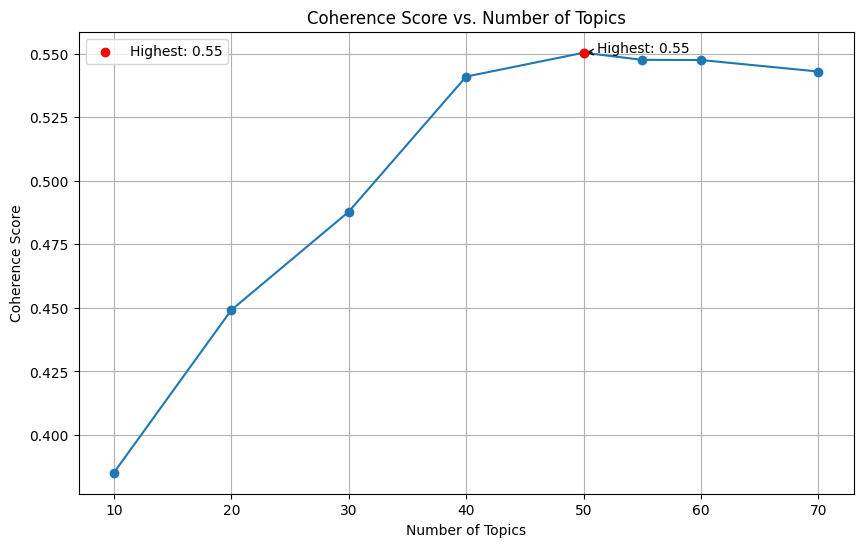

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Coherence scores and corresponding numbers of topics
coherence_scores = [0.3851564, 0.449160872, 0.48785020, 0.541012669,
                    0.550405, 0.5476, 0.547528524, 0.543]
num_topics = [10, 20, 30, 40, 50, 55, 60, 70]

# Create a DataFrame
coherence_df = pd.DataFrame({'Num_Topics': num_topics, 'Coherence_Score': coherence_scores})

# Find the highest coherence score
highest_score_idx = coherence_df['Coherence_Score'].idxmax()
highest_score = coherence_df['Coherence_Score'][highest_score_idx]
highest_num_topics = coherence_df['Num_Topics'][highest_score_idx]

# Plot the coherence scores
plt.figure(figsize=(10, 6))
plt.plot(coherence_df['Num_Topics'], coherence_df['Coherence_Score'], marker='o')
plt.scatter(highest_num_topics, highest_score, color='red', label=f'Highest: {highest_score:.2f}', zorder=5)
plt.annotate(f'Highest: {highest_score:.2f}', xy=(highest_num_topics, highest_score), xytext=(10, 0),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"), fontsize=10)
plt.title('Coherence Score vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Get the topic distribution for each content
topic_distributions = [lda_model.get_document_topics(doc) for doc in corpus]

# Extract the dominant topic and its probability for each content
dominant_topics = [max(topics, key=lambda x: x[1])[0] for topics in topic_distributions]

# Add the dominant topic information to the df1 dataset
df2['Dominant_Topic'] = dominant_topics

# Print the updated df1 dataset with the Dominant_Topic column
print(df2[['content', 'Dominant_Topic']])

                                                  content  Dominant_Topic
0       The Electric Vehicle scam explained 
#ClimateS...               2
1       This lady was a supporter of Green Energy unti...              36
2       That just about sums it up.

#ClimateScam http...               0
3                    #ClimateScam https://t.co/x0mSnuVUY0               0
4                    #ClimateScam https://t.co/3CDsxbYAeO               0
...                                                   ...             ...
274380  Watchdog says electric cars 'are as dirty as d...               2
274503  #ElectricCars gain traction amid push for #sus...              26
274570  #Lithium Drive: #Mercedes and road of sustaina...              35
274862  Just added myself to the http://wefollow.com t...               3
275153  Just added myself to the http://wefollow.com t...               3

[22048 rows x 2 columns]


In [ ]:
df2[['content', 'Dominant_Topic']]

content  Dominant_Topic
0       The Electric Vehicle scam explained 
#ClimateS...               2
1       This lady was a supporter of Green Energy unti...              36
2       That just about sums it up.

#ClimateScam http...               0
3                    #ClimateScam https://t.co/x0mSnuVUY0               0
4                    #ClimateScam https://t.co/3CDsxbYAeO               0
...                                                   ...             ...
274380  Watchdog says electric cars 'are as dirty as d...               2
274503  #ElectricCars gain traction amid push for #sus...              26
274570  #Lithium Drive: #Mercedes and road of sustaina...              35
274862  Just added myself to the http://wefollow.com t...               3
275153  Just added myself to the http://wefollow.com t...               3

[22048 rows x 2 columns]

In [ ]:
df2.sample(2)

tweetDate                                            content  \
105093 2019-11-17  Wow.  Based on the falling price of batteries,...   
189720 2017-07-26  New diesel and petrol vehicles to be banned fr...   

              Username label  length  day  month  year  \
105093     alexmyers83   NaN     221   17     11  2019   
189720  JaswalAnshuman   NaN     132   26      7  2017   

                                             cleaned_text  \
105093  wow based on the falling price of batteries bl...   
189720  new diesel and petrol vehicles to be banned fr...   

                                           processed_docs  \
105093  [wow, based, falling, price, batteries, bloomb...   
189720  [new, diesel, petrol, vehicles, banned,  , #uk...   

                                              lemmas_BOTH  Dominant_Topic  
105093  [price, battery, price, parity, evs, internal,...              39  
189720  [new, diesel, petrol, vehicle, electriccar, gr...              38

<ipython-input-123-b27dbcee53ed>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Ensures that the legend fits within the plot


<Figure size 1200x600 with 0 Axes>

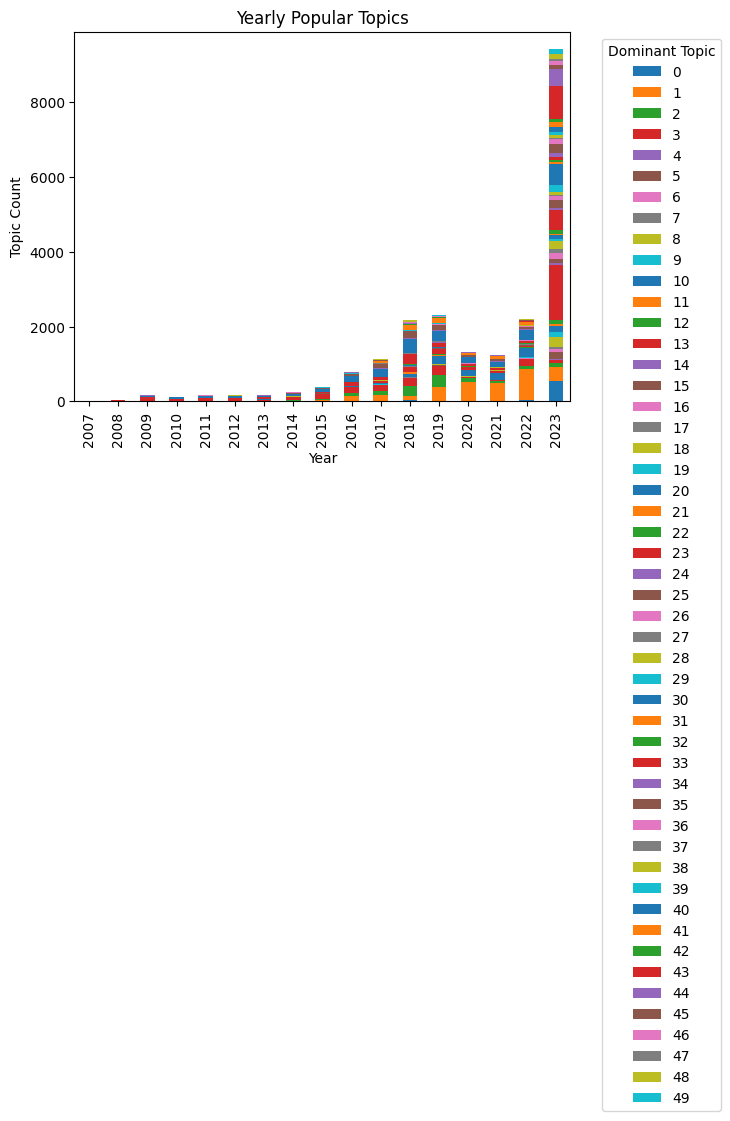

In [ ]:
# Group the data by year and topic, and count the occurrences
yearly_topic_counts = df2.groupby(['year', 'Dominant_Topic']).size().reset_index(name='Topic_Count')

# Pivot the data to get topics as columns and years as rows
pivot_table = yearly_topic_counts.pivot(index='year', columns='Dominant_Topic', values='Topic_Count').fillna(0)

# Plot the data
plt.figure(figsize=(12, 6))
ax = pivot_table.plot(kind='bar', stacked=True)
plt.title('Yearly Popular Topics')
plt.xlabel('Year')
plt.ylabel('Topic Count')
plt.legend(title='Dominant Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Ensures that the legend fits within the plot
plt.show()

<ipython-input-124-ecbe3a78badc>:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Ensures that the legend fits within the plot


<Figure size 1200x600 with 0 Axes>

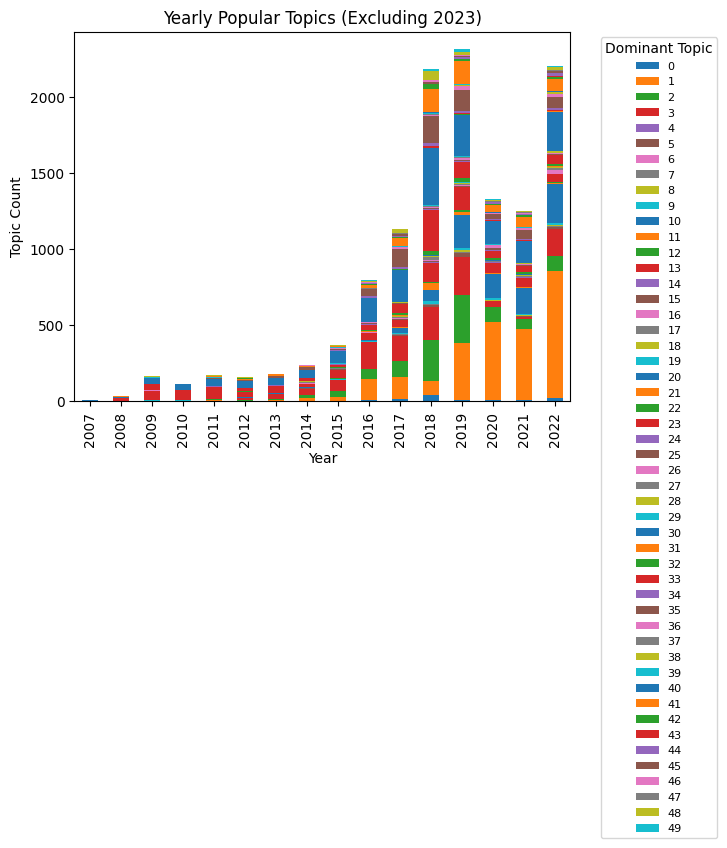

In [ ]:
# Exclude the year 2023 from the data
filtered_df = df2[df2['year'] != 2023]

# Group the filtered data by year and topic, and count the occurrences
yearly_topic_counts = filtered_df.groupby(['year', 'Dominant_Topic']).size().reset_index(name='Topic_Count')

# Pivot the data to get topics as columns and years as rows
pivot_table = yearly_topic_counts.pivot(index='year', columns='Dominant_Topic', values='Topic_Count').fillna(0)

# Plot the data
plt.figure(figsize=(12, 6))
ax = pivot_table.plot(kind='bar', stacked=True)
plt.title('Yearly Popular Topics (Excluding 2023)')
plt.xlabel('Year')
plt.ylabel('Topic Count')
plt.legend(title='Dominant Topic', bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 8})
plt.tight_layout()  # Ensures that the legend fits within the plot
plt.show()

In [ ]:
# Specify the file path where you want to save the Excel file
file_path = '/content/df3.xlsx'

# Save the DataFrame as an Excel file
df2.to_excel(file_path, index=False)

# Print a message indicating the file has been saved
print(f"DataFrame saved as '{file_path}'")

DataFrame saved as '/content/df3.xlsx'


In [ ]:
import pandas as pd

In [ ]:
df3 = pd.read_excel('/content/df3.xlsx')

In [ ]:
df3.isnull().sum()
df3.columns

Index(['tweetDate', 'content', 'Username', 'label', 'length', 'day', 'month',
       'year', 'cleaned_text', 'processed_docs', 'lemmas_BOTH',
       'Dominant_Topic'],
      dtype='object')

In [ ]:
manually_labeled_data = df3[df3['label'].notna()]
####new dataset for taining
new_dataframe = pd.DataFrame({
    'Content': manually_labeled_data['content'],    # Assuming 'Content' is the text column
    'Lemmas': manually_labeled_data['lemmas_BOTH'], # Include 'lemmas_BOTH' column
    'label': manually_labeled_data['label'],
    'processed' : manually_labeled_data['processed_docs'],
    'cleaned' : manually_labeled_data['cleaned_text'] # Assuming 'Label' is the label column
})

In [ ]:
new_dataframe

Content  \
0      The Electric Vehicle scam explained \n#Climate...   
1      This lady was a supporter of Green Energy unti...   
2      That just about sums it up.\n\n#ClimateScam ht...   
3                   #ClimateScam https://t.co/x0mSnuVUY0   
4                   #ClimateScam https://t.co/3CDsxbYAeO   
...                                                  ...   
18629  "Electric cars don't use infrastructure: they ...   
18798  "From 2019, every new car that Volvo launches ...   
19730  "If the European Commission doesn’t keep a tig...   
20819  "Germany wants to ban the sale of new petrol- ...   
21529  "Development of #ElectricCars must go hand in ...   

                                                  Lemmas     label  \
0                                   ['electric', 'scam']  negative   
1      ['lady', 'supporter', 'green', 'energy', 'rese...  negative   
2                                                ['sum']   neutral   
3                                                     []   neutral   
4                                                     []   neutral   
...                                                  ...       ...   
18629  ['car', 'infrastructure', 'infrastructure', 'e...   neutral   
18798  ['new', 'car', 'launch', 'stake', 'electric', ...   neutral   
19730  ['tight', 'grip', 'national', 'car', 'regulato...   neutral   
20819  ['sale', 'new', 'petrol', 'diesel', 'powered',...   neutral   
21529  ['development', 'electriccar', 'hand', 'hand',...   neutral   

                                               processed  \
0      ['electric', 'vehicle', 'scam', 'explained', '...   
1      ['lady', 'supporter', 'green', 'energy', 'rese...   
2                               ['sums', '#climatescam']   
3                                       ['#climatescam']   
4                                       ['#climatescam']   
...                                                  ...   
18629  ['electric', 'cars', 'don', 'use', 'infrastruc...   
18798  [' ', 'new', 'car', 'volvo', 'launches', 'set'...   
19730  ['european', 'commission', 'doesn', 'tight', '...   
20819  ['germany', 'wants', 'ban', 'sale', 'new', 'pe...   
21529  ['development', '#electriccars', 'hand', 'hand...   

                                                 cleaned  
0       the electric vehicle scam explained #climatescam  
1      this lady was supporter of green energy until ...  
2                that just about sums it up #climatescam  
3                                           #climatescam  
4                                           #climatescam  
...                                                  ...  
18629  electric cars don use infrastructure they are ...  
18798  from  every new car that volvo launches is set...  
19730  if the european commission doesn keep tight gr...  
20819  germany wants to ban the sale of new petrol an...  
21529  development of #electriccars must go hand in h...  

[298 rows x 5 columns]

# VADER

In [ ]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Apply VADER sentiment analysis to each preprocessed text in the DataFrame
new_dataframe['vader_sentiment'] = new_dataframe['Lemmas'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

# Function to map compound scores to sentiment labels
def get_sentiment_label(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Map VADER compound scores to sentiment labels
new_dataframe['vader_sentiment_label'] = new_dataframe['vader_sentiment'].apply(get_sentiment_label)

# Display the updated DataFrame
print(new_dataframe)

                                                 Content  \
0      The Electric Vehicle scam explained \n#Climate...   
1      This lady was a supporter of Green Energy unti...   
2      That just about sums it up.\n\n#ClimateScam ht...   
3                   #ClimateScam https://t.co/x0mSnuVUY0   
4                   #ClimateScam https://t.co/3CDsxbYAeO   
...                                                  ...   
18629  "Electric cars don't use infrastructure: they ...   
18798  "From 2019, every new car that Volvo launches ...   
19730  "If the European Commission doesn’t keep a tig...   
20819  "Germany wants to ban the sale of new petrol- ...   
21529  "Development of #ElectricCars must go hand in ...   

                                                  Lemmas     label  \
0                                   ['electric', 'scam']  negative   
1      ['lady', 'supporter', 'green', 'energy', 'rese...  negative   
2                                                ['sum']   neutral   

# EVALUATION

In [ ]:
new_dataframe['vader_sentiment_label'] = new_dataframe['vader_sentiment_label'].replace(['Neutral'], 'neutral')
new_dataframe['vader_sentiment_label'] = new_dataframe['vader_sentiment_label'].replace(['Negative'], 'negative')
new_dataframe['vader_sentiment_label'] = new_dataframe['vader_sentiment_label'].replace(['Positive'], 'positive')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
true_labels = new_dataframe['label']
# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, new_dataframe['vader_sentiment_label'])
precision = precision_score(true_labels, new_dataframe['vader_sentiment_label'], average='weighted')
recall = recall_score(true_labels, new_dataframe['vader_sentiment_label'], average='weighted')
f1 = f1_score(true_labels, new_dataframe['vader_sentiment_label'], average='weighted')
confusion = confusion_matrix(true_labels, new_dataframe['vader_sentiment_label'])

# Print evaluation metrics
print(f"Accuracy_VADER: {accuracy:.2f}")
print(f"Precision_VADER: {precision:.2f}")
print(f"Recall_VADER: {recall:.2f}")
print(f"F1-Score_VADER: {f1:.2f}")
print("Confusion Matrix_VADER:")
print(confusion)

Accuracy_VADER: 0.45
Precision_VADER: 0.57
Recall_VADER: 0.45
F1-Score_VADER: 0.48
Confusion Matrix_VADER:
[[31 23 22]
 [11 22  9]
 [ 2  4  4]]


# NAIVE BAYES

In [ ]:
from textblob import TextBlob

In [ ]:
# Apply Naive Bayes sentiment analysis to each preprocessed text in the DataFrame
def get_sentiment_label(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity >= 0.05:
        return 'Positive'
    elif analysis.sentiment.polarity <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the mapping function to generate sentiment labels
new_dataframe['naive_bayes_sentiment_label'] = new_dataframe['Lemmas'].apply(get_sentiment_label)

# Display the updated DataFrame
print(new_dataframe)

                                                 Content  \
0      The Electric Vehicle scam explained \n#Climate...   
1      This lady was a supporter of Green Energy unti...   
6      "Climate Change" actor vs. actually caring for...   
19     Speaking in 1994, ex-intelligence officer turn...   
21     #ClimateScam\n\nChange the map color to increa...   
...                                                  ...   
10088  via @NYTimes  Montana rules it has a constitut...   
10089  404470 Stock Fund Price and Chart KRX:404470 T...   
10090  NEW POST - Shutdown: can climate change make o...   
10091  .\nMontana  judge hands historic win to young ...   
10092  Far-right populist Javier Milei is the biggest...   

                                                  Lemmas     label  \
0                                   ['electric', 'scam']  negative   
1      ['lady', 'supporter', 'green', 'energy', 'rese...  negative   
6               ['climate', 'change', 'actor', 'planet']  negative   

In [ ]:
new_dataframe['naive_bayes_sentiment_label'] = new_dataframe['naive_bayes_sentiment_label'].replace(['Neutral'], 'neutral')
new_dataframe['naive_bayes_sentiment_label'] = new_dataframe['naive_bayes_sentiment_label'].replace(['Negative'], 'negative')
new_dataframe['naive_bayes_sentiment_label'] = new_dataframe['naive_bayes_sentiment_label'].replace(['Positive'], 'positive')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'true_sentiment_label' is the column name with the true sentiment labels in your new_dataframe
true_labels = new_dataframe['label']
naive_bayes_labels = new_dataframe['naive_bayes_sentiment_label']

# Generate classification report
classification_rep = classification_report(true_labels, naive_bayes_labels, output_dict=True)

# Extract and print accuracy, precision, recall, and f1-score
accuracy = classification_rep['accuracy']
precision = classification_rep['macro avg']['precision']
recall = classification_rep['macro avg']['recall']
f1_score = classification_rep['macro avg']['f1-score']

print(f'Accuracy_NB: {accuracy:.2f}')
print(f'Precision_NB: {precision:.2f}')
print(f'Recall_NB: {recall:.2f}')
print(f'F1 Score_NB: {f1_score:.2f}')

# Calculate confusion matrix
confusion = confusion_matrix(true_labels, naive_bayes_labels)

print("\nConfusion Matrix:")
print(confusion)


Accuracy_NB: 0.34
Precision_NB: 0.35
Recall_NB: 0.34
F1 Score_NB: 0.29

Confusion Matrix:
[[16 38 22]
 [ 7 25 10]
 [ 2  6  2]]


# VADER FOR UNLABLLED DATA

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment label using VADER
def get_sentiment_label(text):
    sentiment_scores = analyzer.polarity_scores(text)

    # Determine sentiment label based on the compound score
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the mapping function to generate sentiment labels using VADER
df3['vader_sentiment_label'] = df3['lemmas_BOTH'].apply(get_sentiment_label)

# Display the updated DataFrame with VADER sentiment labels
print(df3)


       tweetDate                                            content  \
0     2023-07-28  The Electric Vehicle scam explained \n#Climate...   
1     2023-07-28  This lady was a supporter of Green Energy unti...   
2     2023-07-28  That just about sums it up.\n\n#ClimateScam ht...   
3     2023-07-25               #ClimateScam https://t.co/x0mSnuVUY0   
4     2023-07-25               #ClimateScam https://t.co/3CDsxbYAeO   
...          ...                                                ...   
22036 2011-02-26  Watchdog says electric cars 'are as dirty as d...   
22037 2011-02-15  #ElectricCars gain traction amid push for #sus...   
22038 2011-02-09  #Lithium Drive: #Mercedes and road of sustaina...   
22039 2011-01-15  Just added myself to the http://wefollow.com t...   
22040 2011-01-08  Just added myself to the http://wefollow.com t...   

              Username     label  length  day  month  year  \
0          Kohima_Sean  negative      73   28      7  2023   
1              Bel_B30 

In [ ]:
df3

tweetDate                                            content  \
0     2023-07-28  The Electric Vehicle scam explained \n#Climate...   
1     2023-07-28  This lady was a supporter of Green Energy unti...   
2     2023-07-28  That just about sums it up.\n\n#ClimateScam ht...   
3     2023-07-25               #ClimateScam https://t.co/x0mSnuVUY0   
4     2023-07-25               #ClimateScam https://t.co/3CDsxbYAeO   
...          ...                                                ...   
22043 2011-02-26  Watchdog says electric cars 'are as dirty as d...   
22044 2011-02-15  #ElectricCars gain traction amid push for #sus...   
22045 2011-02-09  #Lithium Drive: #Mercedes and road of sustaina...   
22046 2011-01-15  Just added myself to the http://wefollow.com t...   
22047 2011-01-08  Just added myself to the http://wefollow.com t...   

              Username     label  length  day  month  year  \
0          Kohima_Sean  negative      73   28      7  2023   
1              Bel_B30  negative     230   28      7  2023   
2      wideawake_media       NaN      65   28      7  2023   
3       AntonioTweets2       NaN      36   25      7  2023   
4       AntonioTweets2       NaN      36   25      7  2023   
...                ...       ...     ...  ...    ...   ...   
22043        johnnyA99       NaN     123   26      2  2011   
22044       meEventsIT       NaN     121   15      2  2011   
22045            Sufiy       NaN     130    9      2  2011   
22046  bfreenews_green       NaN     139   15      1  2011   
22047       DmitriiRUS       NaN     139    8      1  2011   

                                            cleaned_text  \
0       the electric vehicle scam explained #climatescam   
1      this lady was supporter of green energy until ...   
2                that just about sums it up #climatescam   
3                                           #climatescam   
4                                           #climatescam   
...                                                  ...   
22043  watchdog says electric cars are as dirty as di...   
22044  #electriccars gain traction amid push for #sus...   
22045  #lithium drive #mercedes and road of sustainab...   
22046  just added myself to the twitter directory und...   
22047  just added myself to the twitter directory und...   

                                          processed_docs  \
0      ['electric', 'vehicle', 'scam', 'explained', '...   
1      ['lady', 'supporter', 'green', 'energy', 'rese...   
2                               ['sums', '#climatescam']   
3                                       ['#climatescam']   
4                                       ['#climatescam']   
...                                                  ...   
22043  ['watchdog', 'says', 'electric', 'cars', 'dirt...   
22044  ['#electriccars', 'gain', 'traction', 'amid', ...   
22045  ['#lithium', 'drive', '#mercedes', 'road', 'su...   
22046  ['added', 'twitter', 'directory', '#barcelona'...   
22047  ['added', 'twitter', 'directory', '#st_petersb...   

                                             lemmas_BOTH  Dominant_Topic  \
0                                   ['electric', 'scam']               2   
1      ['lady', 'supporter', 'green', 'energy', 'rese...              36   
2                                                ['sum']               0   
3                                                     []               0   
4                                                     []               0   
...                                                  ...             ...   
22043  ['watchdog', 'electric', 'car', 'dirty', 'dies...               2   
22044  ['electriccar', 'traction', 'push', 'sustainab...              26   
22045  ['lithium', 'drive', 'mercede', 'road', 'susta...              35   
22046  ['twitter', 'directory', 'barcelona', 'news', ...               3   
22047  ['twitter', 'directory', 'energyefficiency', '...               3   

      vader_sentiment_label  
0                  negat

## FREQUENCY ANALYSIS

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
# Regular expression pattern to match hashtags
hashtag_pattern = r'#\w+'

# Function to extract hashtags from a text
def extract_hashtags(text):
    if isinstance(text, str):  # Check if the value is a string
        hashtags = re.findall(hashtag_pattern, text)
        return hashtags
    else:
        return []

# Apply the function to extract hashtags from 'cleaned_text'
df3['hashtags'] = df3['cleaned_text'].apply(extract_hashtags)

# Print the DataFrame with extracted hashtags
print(df3[['cleaned_text', 'hashtags', 'year']])

                                            cleaned_text  \
0       the electric vehicle scam explained #climatescam   
1      this lady was supporter of green energy until ...   
2                that just about sums it up #climatescam   
3                                           #climatescam   
4                                           #climatescam   
...                                                  ...   
22036  watchdog says electric cars are as dirty as di...   
22037  #electriccars gain traction amid push for #sus...   
22038  #lithium drive #mercedes and road of sustainab...   
22039  just added myself to the twitter directory und...   
22040  just added myself to the twitter directory und...   

                                                hashtags  year  
0                                         [#climatescam]  2023  
1                                         [#climatescam]  2023  
2                                         [#climatescam]  2023  
3                  

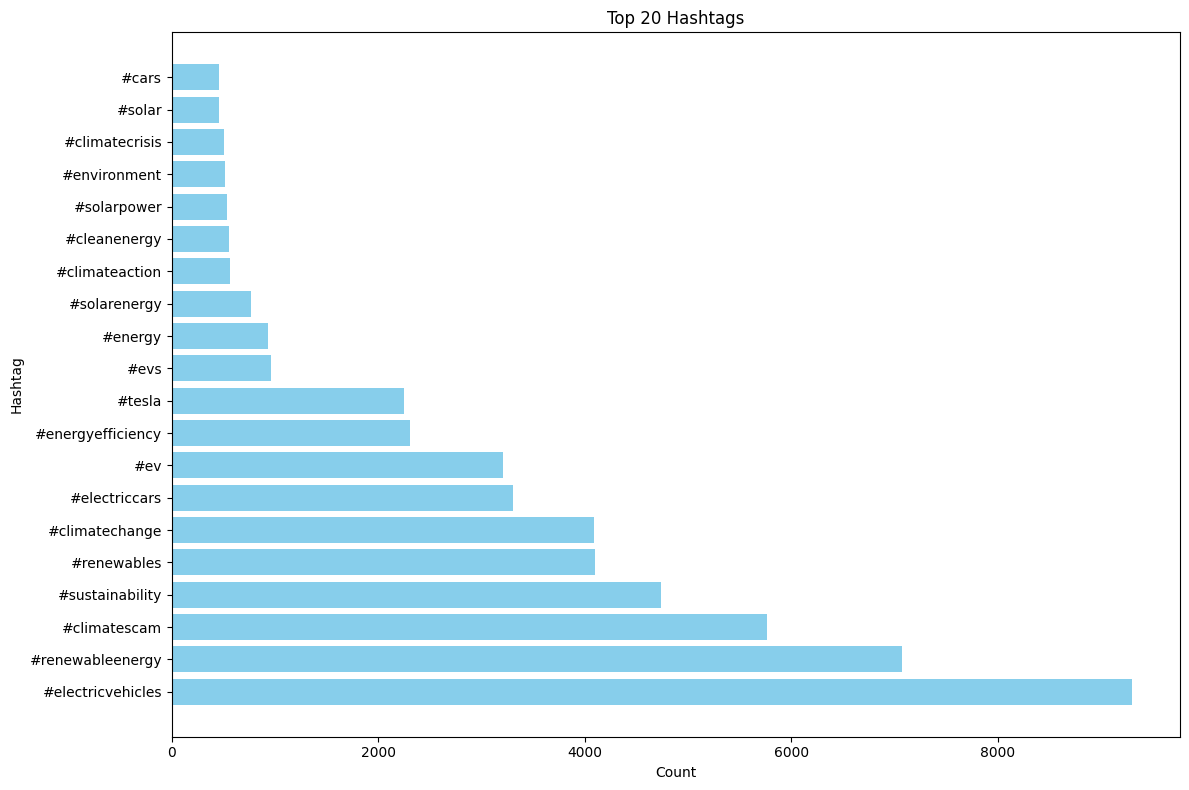

In [ ]:
# Flatten the list of hashtags
all_hashtags = [hashtag for hashtags_list in df3['hashtags'].dropna() for hashtag in hashtags_list]

# Count the occurrences of each hashtag
hashtags_count = Counter(all_hashtags)

# Convert the counts to a DataFrame
hashtags_df = pd.DataFrame(hashtags_count.items(), columns=['Hashtag', 'Count'])

# Sort the DataFrame by count in descending order
hashtags_df = hashtags_df.sort_values(by='Count', ascending=False)

# Plot the top N hashtags
top_n = 20  # You can adjust this value
top_hashtags_df = hashtags_df.head(top_n)
plt.figure(figsize=(12, 8))
plt.barh(top_hashtags_df['Hashtag'], top_hashtags_df['Count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Hashtag')
plt.title(f'Top {top_n} Hashtags')
plt.tight_layout()
plt.show()

In [ ]:
# Function to extract hashtags from a text
def extract_hashtags(text):
    if isinstance(text, str):  # Check if the value is a string
        hashtags = re.findall(hashtag_pattern, text)
        return [tag.lower() for tag in hashtags]  # Convert hashtags to lowercase
    else:
        return []

# Apply the function to extract hashtags from 'cleaned_text'
df3['hashtags'] = df3['cleaned_text'].apply(extract_hashtags)

# Create a dictionary to store hashtag-year information
hashtag_year_dict = {}

# Iterate through each row in the DataFrame
for index, row in df3.iterrows():
    hashtags = row['hashtags']
    year = row['year']

    for hashtag in hashtags:
        if hashtag in hashtag_year_dict:
            # Update the count for the hashtag and corresponding year
            if year in hashtag_year_dict[hashtag]:
                hashtag_year_dict[hashtag][year] += 1
            else:
                hashtag_year_dict[hashtag][year] = 1
        else:
            hashtag_year_dict[hashtag] = {year: 1}

# Create a DataFrame to store the most used years for each hashtag
most_used_years_df = pd.DataFrame(columns=['hashtag', 'most_used_year', 'count'])

# Populate the DataFrame with most used year information
for hashtag, year_counts in hashtag_year_dict.items():
    most_used_year = max(year_counts, key=year_counts.get)
    count = year_counts[most_used_year]
    most_used_years_df = most_used_years_df.append({'hashtag': hashtag, 'most_used_year': most_used_year, 'count': count}, ignore_index=True)

# Display the DataFrame
print(most_used_years_df)


Görüntülenen çıkış son 5000 satıra kısaltıldı.
<ipython-input-111-894005b471f9>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  most_used_years_df = most_used_years_df.append({'hashtag': hashtag, 'most_used_year': most_used_year, 'count': count}, ignore_index=True)
<ipython-input-111-894005b471f9>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  most_used_years_df = most_used_years_df.append({'hashtag': hashtag, 'most_used_year': most_used_year, 'count': count}, ignore_index=True)
<ipython-input-111-894005b471f9>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  most_used_years_df = most_used_years_df.append({'hashtag': hashtag, 'most_used_year': most_used_year, 'count': count}, ignore_index=True)
<ipython-input-111-8940

                 hashtag most_used_year count
0           #climatescam           2023  5662
1      #climateemergency           2023   280
2             #wefagenda           2023    93
3                   #wef           2023    76
4           #climatehoax           2023   145
...                  ...            ...   ...
11522               #agw           2011     2
11523              #plug           2011     1
11524     #houston_texas           2011     1
11525         #wikileaks           2011     1
11526     #st_petersburg           2011     1

[11527 rows x 3 columns]


<ipython-input-111-894005b471f9>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  most_used_years_df = most_used_years_df.append({'hashtag': hashtag, 'most_used_year': most_used_year, 'count': count}, ignore_index=True)
<ipython-input-111-894005b471f9>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  most_used_years_df = most_used_years_df.append({'hashtag': hashtag, 'most_used_year': most_used_year, 'count': count}, ignore_index=True)
<ipython-input-111-894005b471f9>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  most_used_years_df = most_used_years_df.append({'hashtag': hashtag, 'most_used_year': most_used_year, 'count': count}, ignore_index=True)
<ipython-input-111-894005b471f9>:37: FutureWarning: The frame.append m

Görüntülenen çıkış son 5000 satıra kısaltıldı.
<ipython-input-112-7941249223b3>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  most_used_years_df = most_used_years_df.append({'hashtag': hashtag, 'most_used_year': most_used_year, 'count': count}, ignore_index=True)
<ipython-input-112-7941249223b3>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  most_used_years_df = most_used_years_df.append({'hashtag': hashtag, 'most_used_year': most_used_year, 'count': count}, ignore_index=True)
<ipython-input-112-7941249223b3>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  most_used_years_df = most_used_years_df.append({'hashtag': hashtag, 'most_used_year': most_used_year, 'count': count}, ignore_index=True)
<ipython-input-112-7941249

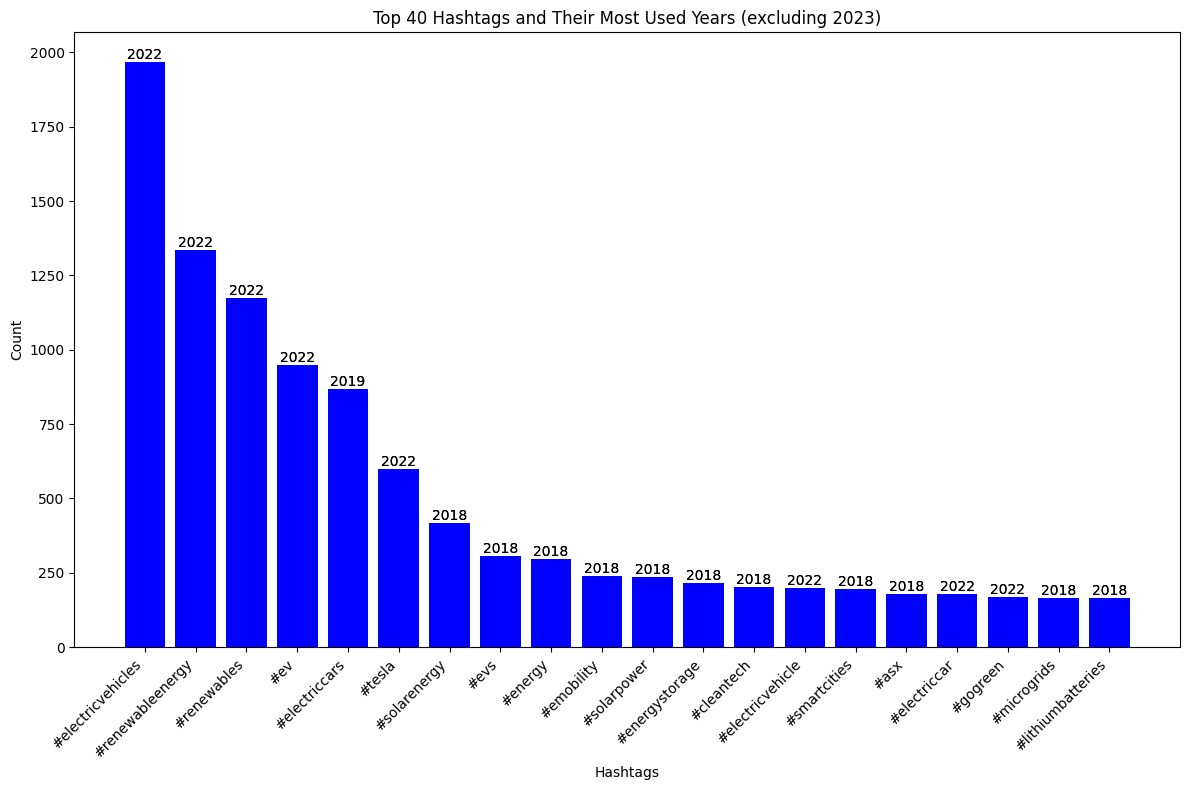

In [ ]:
# Populate the DataFrame with most used year information
for hashtag, year_counts in hashtag_year_dict.items():
    most_used_year = max(year_counts, key=year_counts.get)
    count = year_counts[most_used_year]
    most_used_years_df = most_used_years_df.append({'hashtag': hashtag, 'most_used_year': most_used_year, 'count': count}, ignore_index=True)

# Filter out rows with the year 2023
most_used_years_df = most_used_years_df[most_used_years_df['most_used_year'] != 2023]

# Sort the DataFrame by count in descending order
most_used_years_df = most_used_years_df.sort_values(by='count', ascending=False)

# Select the top 40 hashtags
top_40_hashtags = most_used_years_df.head(40)

# Create a bar plot of hashtags and their most used years
plt.figure(figsize=(12, 8))
bars = plt.bar(top_40_hashtags['hashtag'], top_40_hashtags['count'], color='blue')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.title('Top 40 Hashtags and Their Most Used Years (excluding 2023)')
plt.xticks(rotation=45, ha='right')

# Add year information on top of each bar
for bar, year in zip(bars, top_40_hashtags['most_used_year']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(year),
             ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [ ]:
df3.columns

Index(['tweetDate', 'content', 'Username', 'label', 'length', 'day', 'month',
       'year', 'cleaned_text', 'processed_docs', 'lemmas_BOTH',
       'Dominant_Topic', 'vader_sentiment_label', 'hashtags'],
      dtype='object')

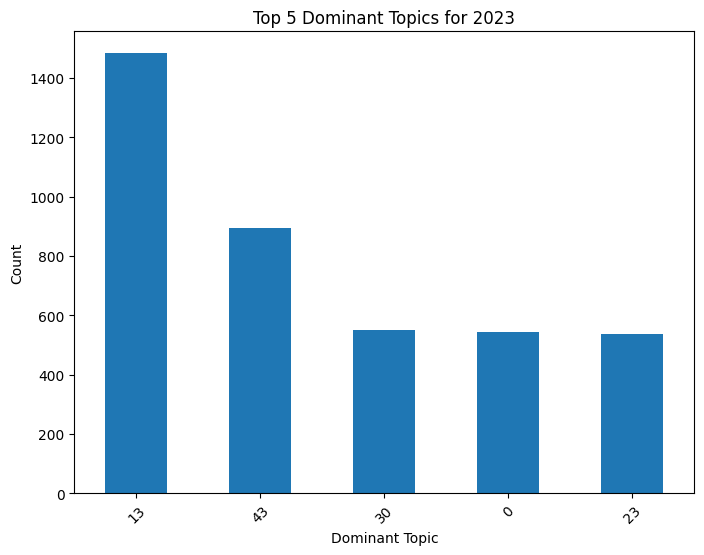

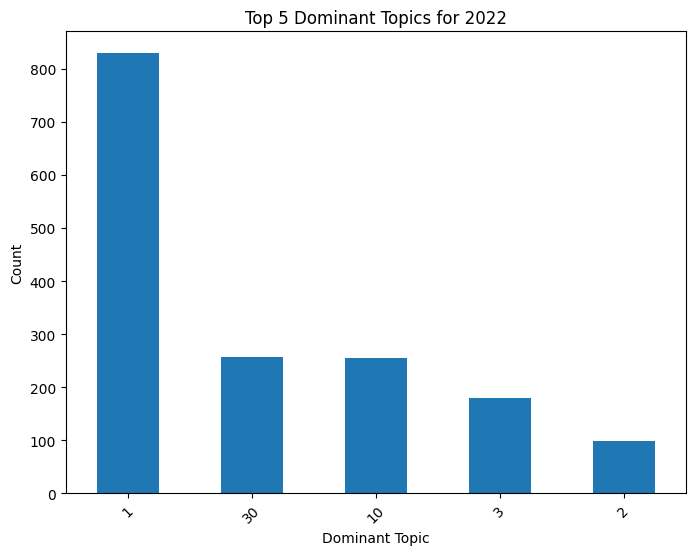

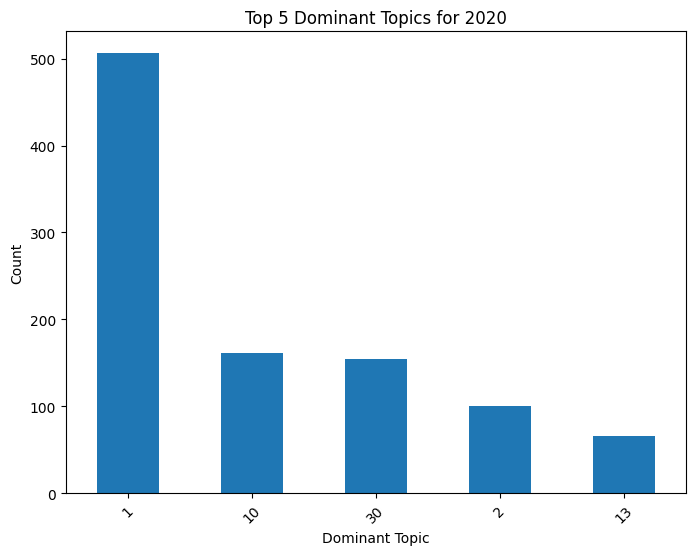

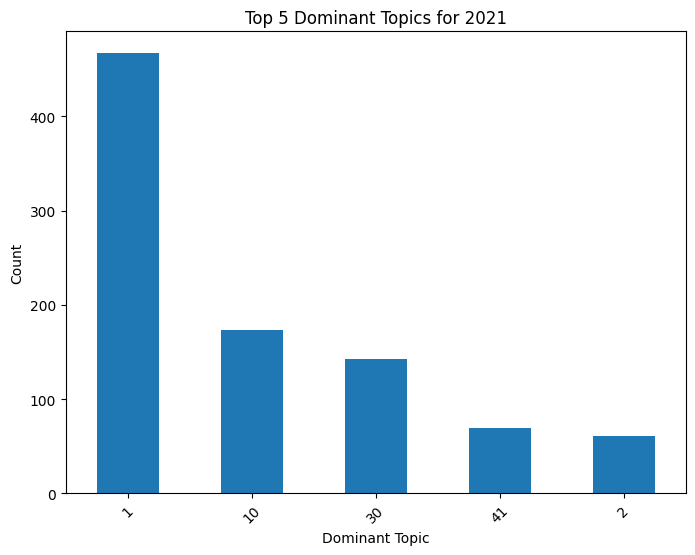

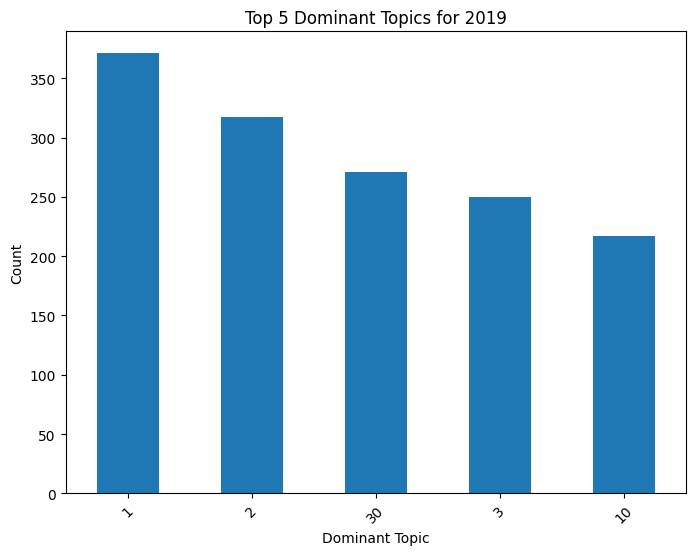

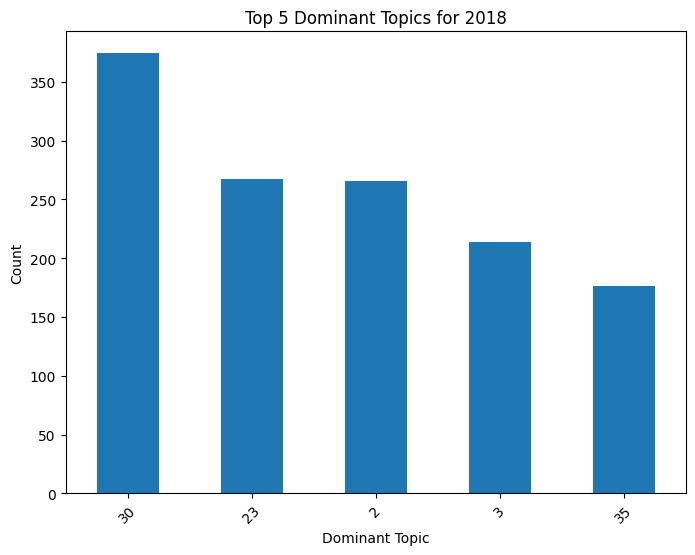

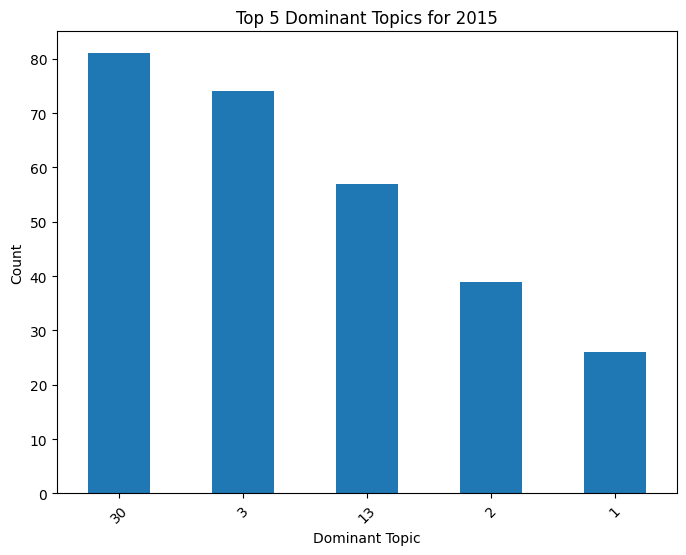

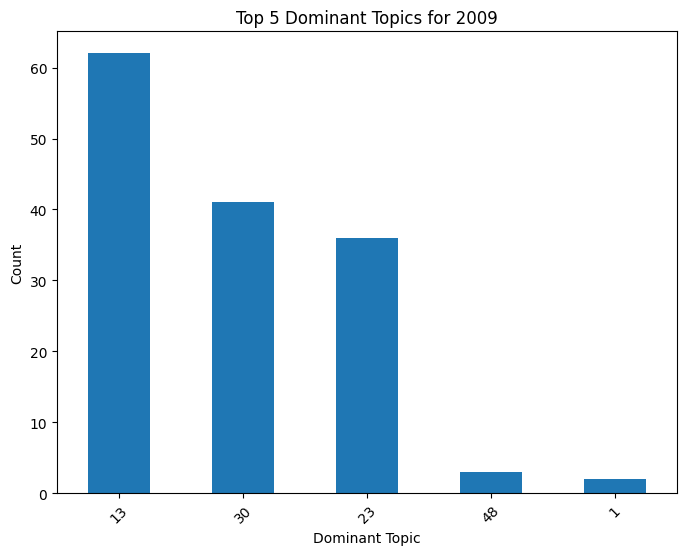

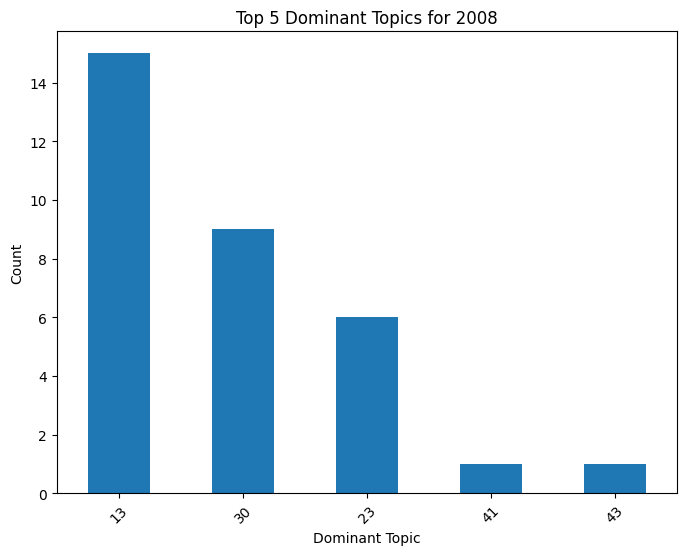

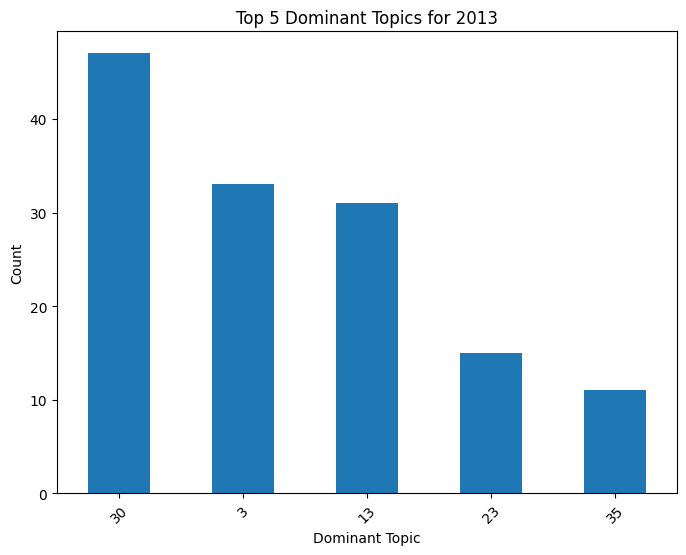

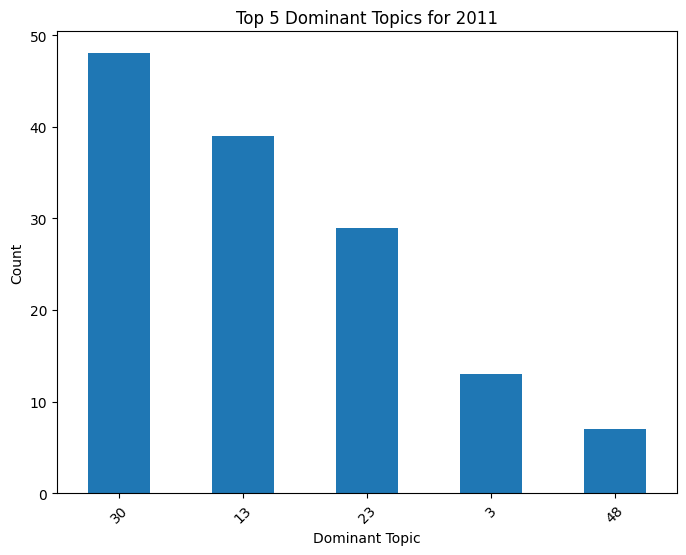

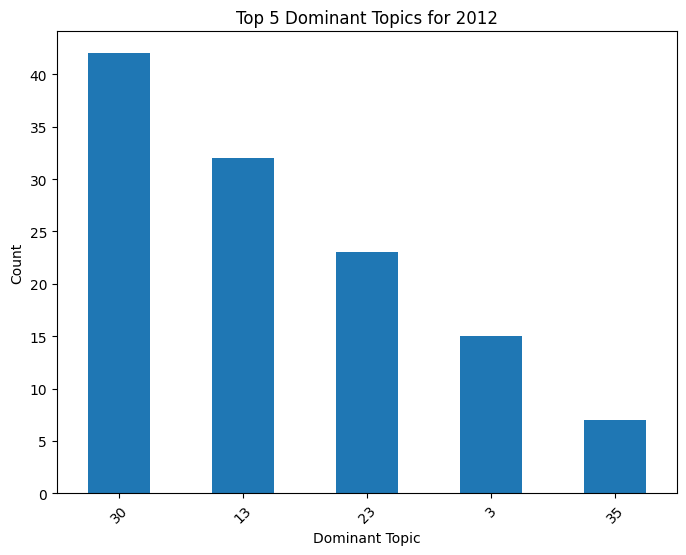

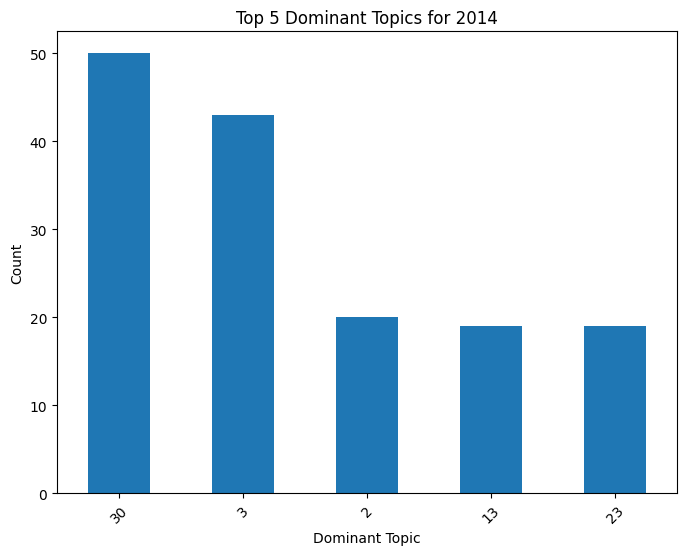

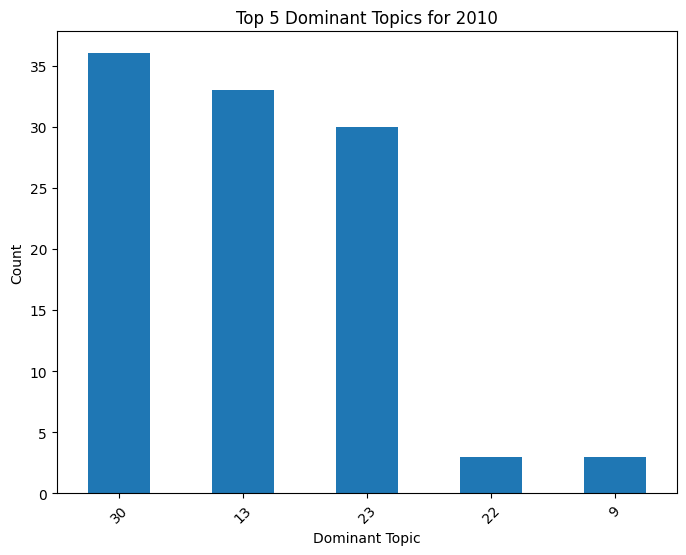

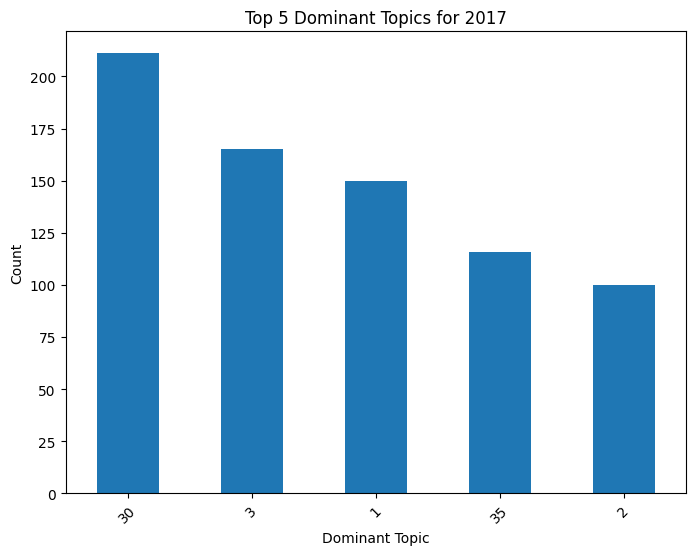

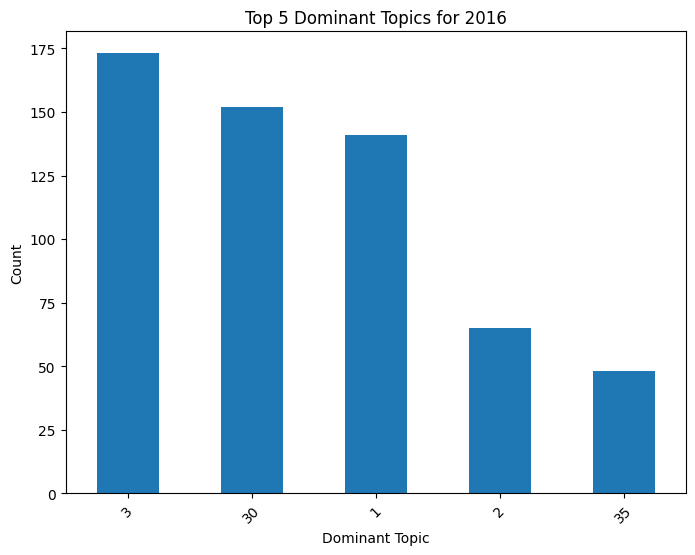

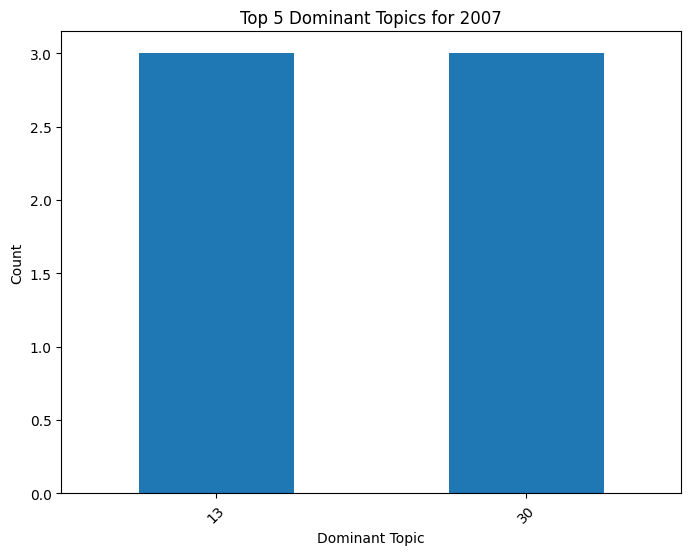

In [ ]:
# Get a list of unique years in your DataFrame
years = df3['year'].unique()

# Define the number of top topics to display for each year
top_topics_per_year = 5

# Loop through each year and create a bar plot
for year in years:
    # Filter the DataFrame for the current year
    year_df = df3[df3['year'] == year]

    # Group the data by dominant topic and count occurrences
    topic_counts = year_df['Dominant_Topic'].value_counts().head(top_topics_per_year)

    # Plot the dominant topics for the current year
    plt.figure(figsize=(8, 6))
    topic_counts.plot(kind='bar')
    plt.title(f'Top {top_topics_per_year} Dominant Topics for {year}')
    plt.xlabel('Dominant Topic')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

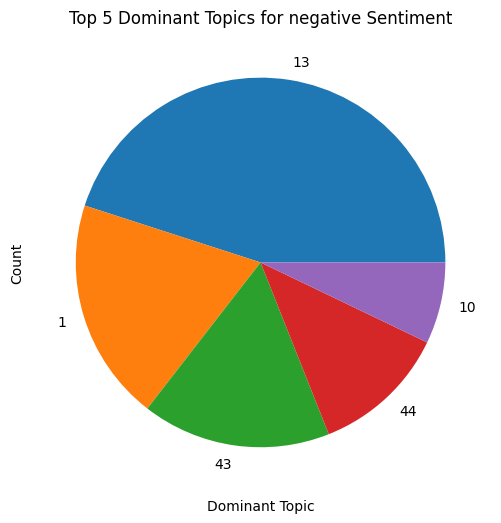

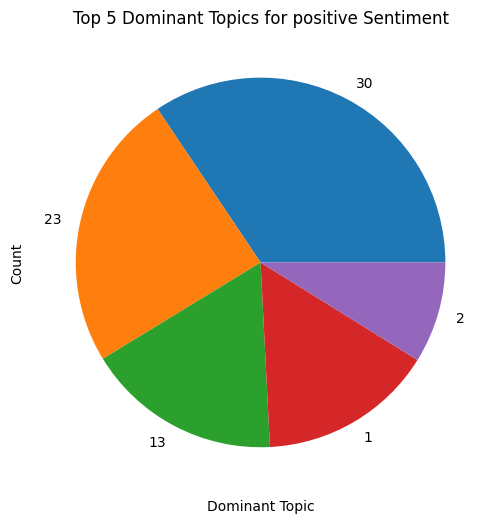

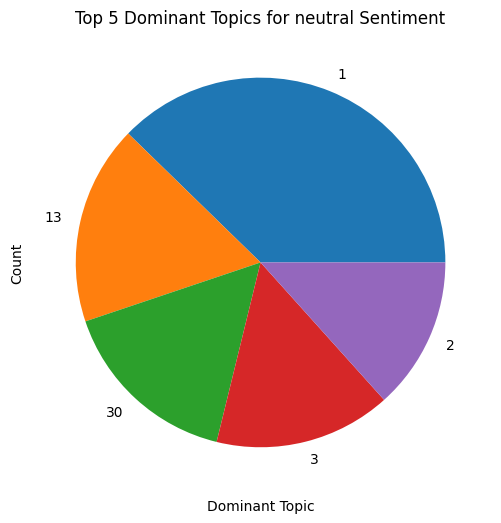

In [ ]:
# Get a list of unique sentiments in your DataFrame
sentiments = df3['vader_sentiment_label'].unique()

# Define the number of top topics to display for each sentiment
top_topics_per_sentiment = 5

# Loop through each sentiment and create a bar plot
for sentiment in sentiments:
    # Filter the DataFrame for the current sentiment label
    sentiment_df = df3[df3['vader_sentiment_label'] == sentiment]

    # Group the data by dominant topic and count occurrences
    topic_counts = sentiment_df['Dominant_Topic'].value_counts().head(top_topics_per_sentiment)

    # Plot the dominant topics for the current sentiment
    plt.figure(figsize=(8, 6))
    topic_counts.plot(kind='pie')
    plt.title(f'Top {top_topics_per_sentiment} Dominant Topics for {sentiment} Sentiment')
    plt.xlabel('Dominant Topic')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


<Figure size 1000x600 with 0 Axes>

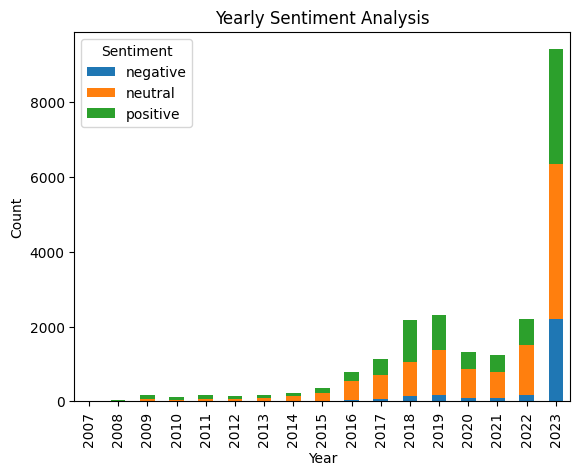

In [ ]:
# Group data by year and sentiment label, then count occurrences
sentiment_counts = df3.groupby(['year', 'vader_sentiment_label']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', stacked=True)
plt.title('Yearly Sentiment Analysis')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

<Figure size 1000x600 with 0 Axes>

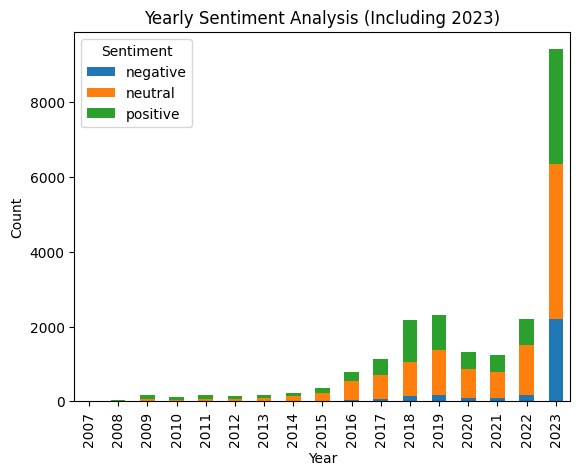

In [ ]:
# Group data by year and sentiment label, then count occurrences
sentiment_counts = df3.groupby(['year', 'vader_sentiment_label']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', stacked=True)
plt.title('Yearly Sentiment Analysis (Including 2023)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

<Figure size 1000x600 with 0 Axes>

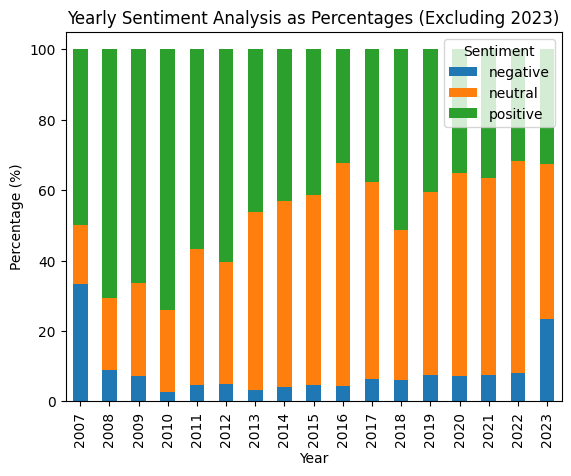

In [ ]:


# Calculate the total count for each year
yearly_total_counts = sentiment_counts.sum(axis=1)

# Calculate the percentages
sentiment_percentages = sentiment_counts.div(yearly_total_counts, axis=0) * 100

# Plotting
plt.figure(figsize=(10, 6))
sentiment_percentages.plot(kind='bar', stacked=True)
plt.title('Yearly Sentiment Analysis as Percentages (Excluding 2023)')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend(title='Sentiment')
plt.show()


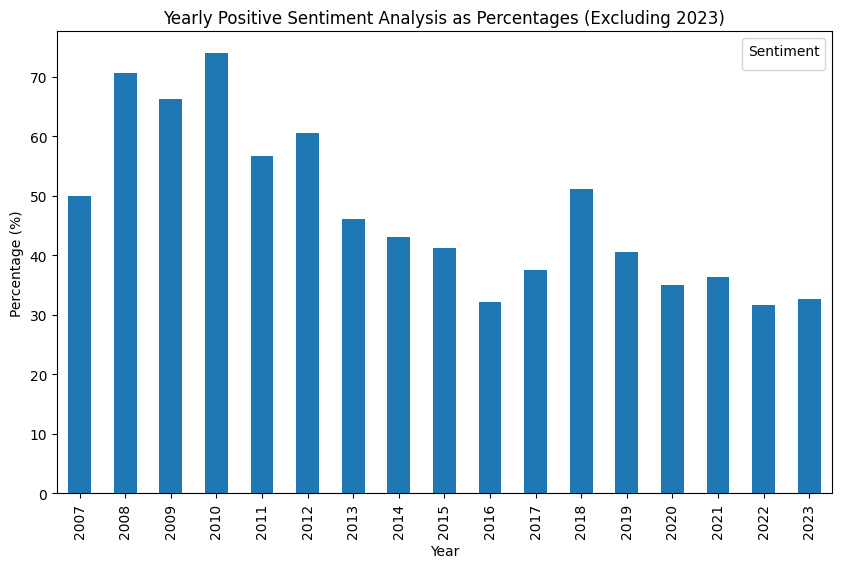

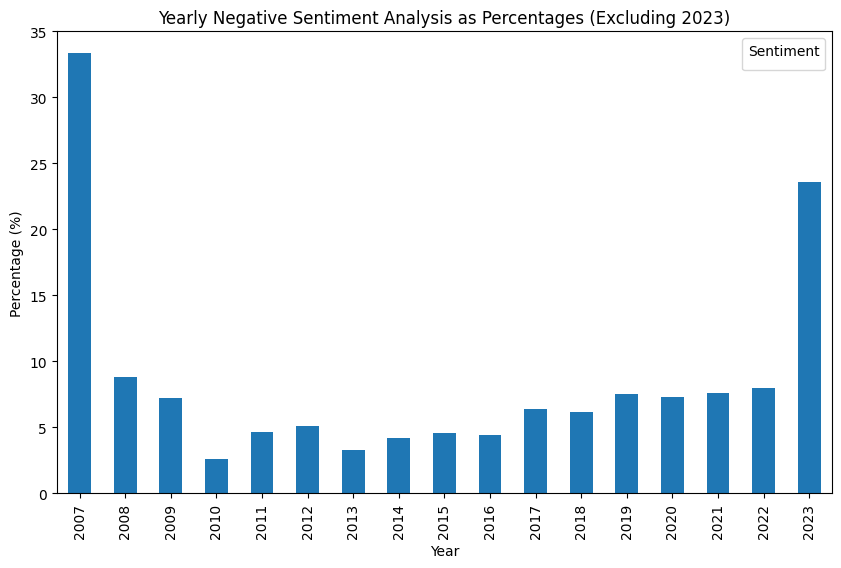

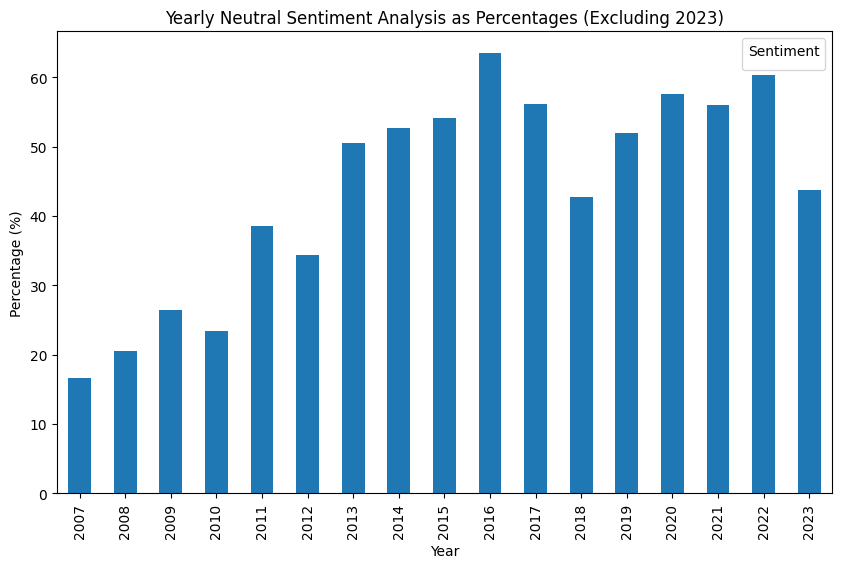

In [ ]:
# Calculate the percentages for each sentiment label
positive_percentage = sentiment_counts['positive'] / yearly_total_counts * 100
negative_percentage = sentiment_counts['negative'] / yearly_total_counts * 100
neutral_percentage = sentiment_counts['neutral'] / yearly_total_counts * 100

# Plotting positive sentiment as percentages
plt.figure(figsize=(10, 6))
positive_percentage.plot(kind='bar', stacked=True)
plt.title('Yearly Positive Sentiment Analysis as Percentages (Excluding 2023)')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend(title='Sentiment')
plt.show()

# Plotting negative sentiment as percentages
plt.figure(figsize=(10, 6))
negative_percentage.plot(kind='bar', stacked=True)
plt.title('Yearly Negative Sentiment Analysis as Percentages (Excluding 2023)')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend(title='Sentiment')
plt.show()

# Plotting neutral sentiment as percentages
plt.figure(figsize=(10, 6))
neutral_percentage.plot(kind='bar', stacked=True)
plt.title('Yearly Neutral Sentiment Analysis as Percentages (Excluding 2023)')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend(title='Sentiment')
plt.show()


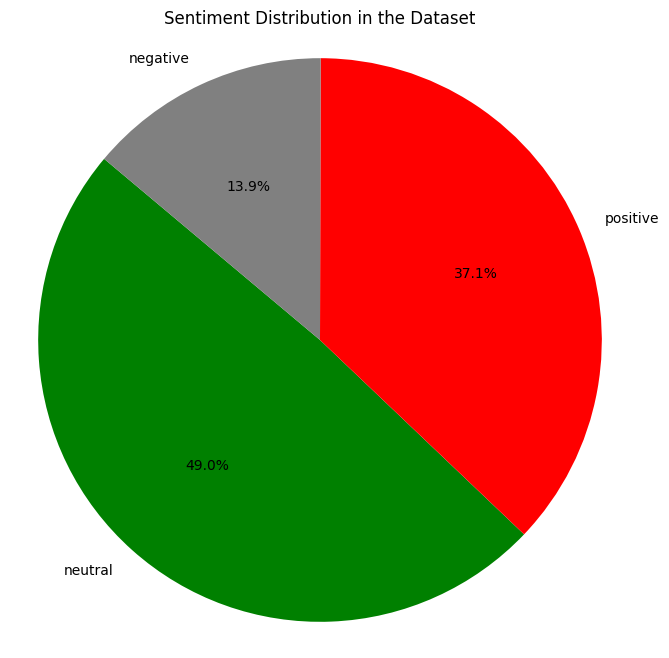

In [ ]:
# Assuming df3 has 'naive_bayes_sentiment_label' column
sentiment_counts = df3['vader_sentiment_label'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'red', 'gray'])
plt.title('Sentiment Distribution in the Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
import numpy as np

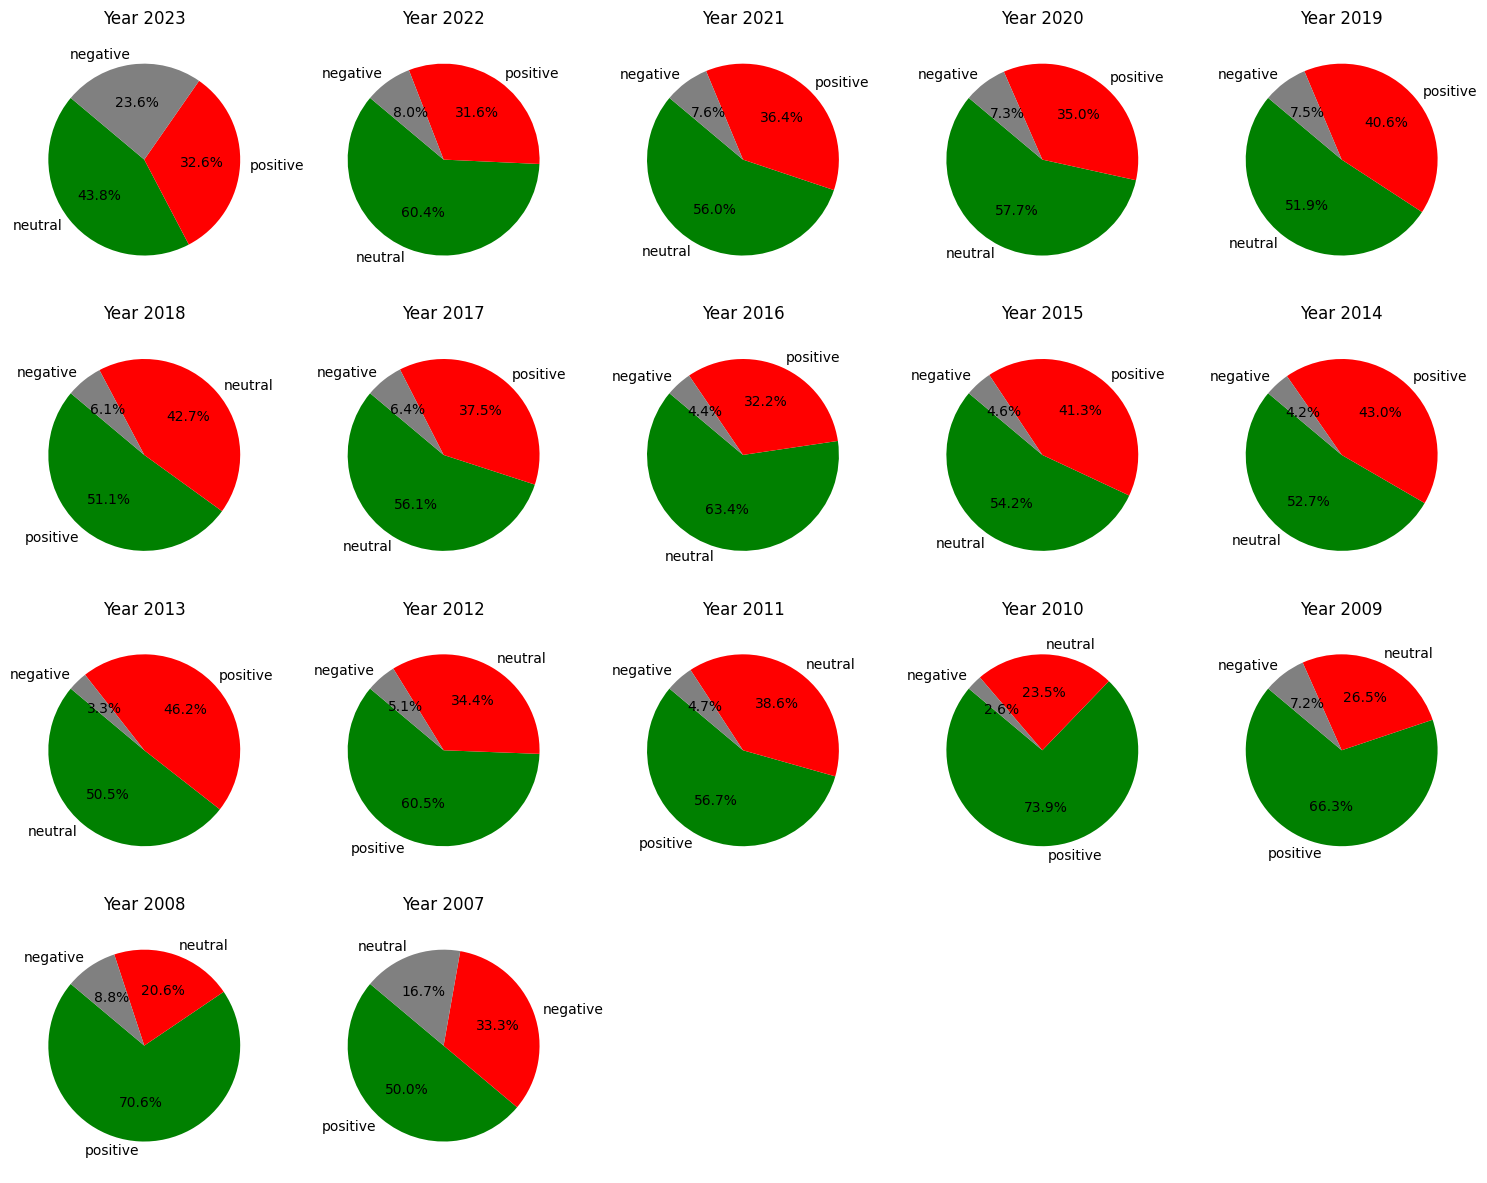

In [ ]:
# Assuming df3 has 'year' and 'naive_bayes_sentiment_label' columns
unique_years = df3['year'].unique()
unique_years = np.sort(unique_years)[::-1]  # Sort years in descending order

# Create subplots for each year in a 4x5 grid
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 12))

# Reshape the axes array to match the 4x5 grid
axes = np.reshape(axes, -1)

for i, year in enumerate(unique_years):
    if i < 20:  # Make sure not to exceed the available subplots
        # Filter data for the current year
        year_data = df3[df3['year'] == year]

        # Count sentiment labels for the current year
        sentiment_counts = year_data['vader_sentiment_label'].value_counts()

        # Create a pie chart for the current year
        ax = axes[i]
        ax.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140,
               colors=['green', 'red', 'gray'])
        ax.set_title(f'Year {year}')
        ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Remove empty subplots
for i in range(len(unique_years), 20):
    fig.delaxes(axes[i])

# Adjust layout spacing
plt.tight_layout()
plt.show()


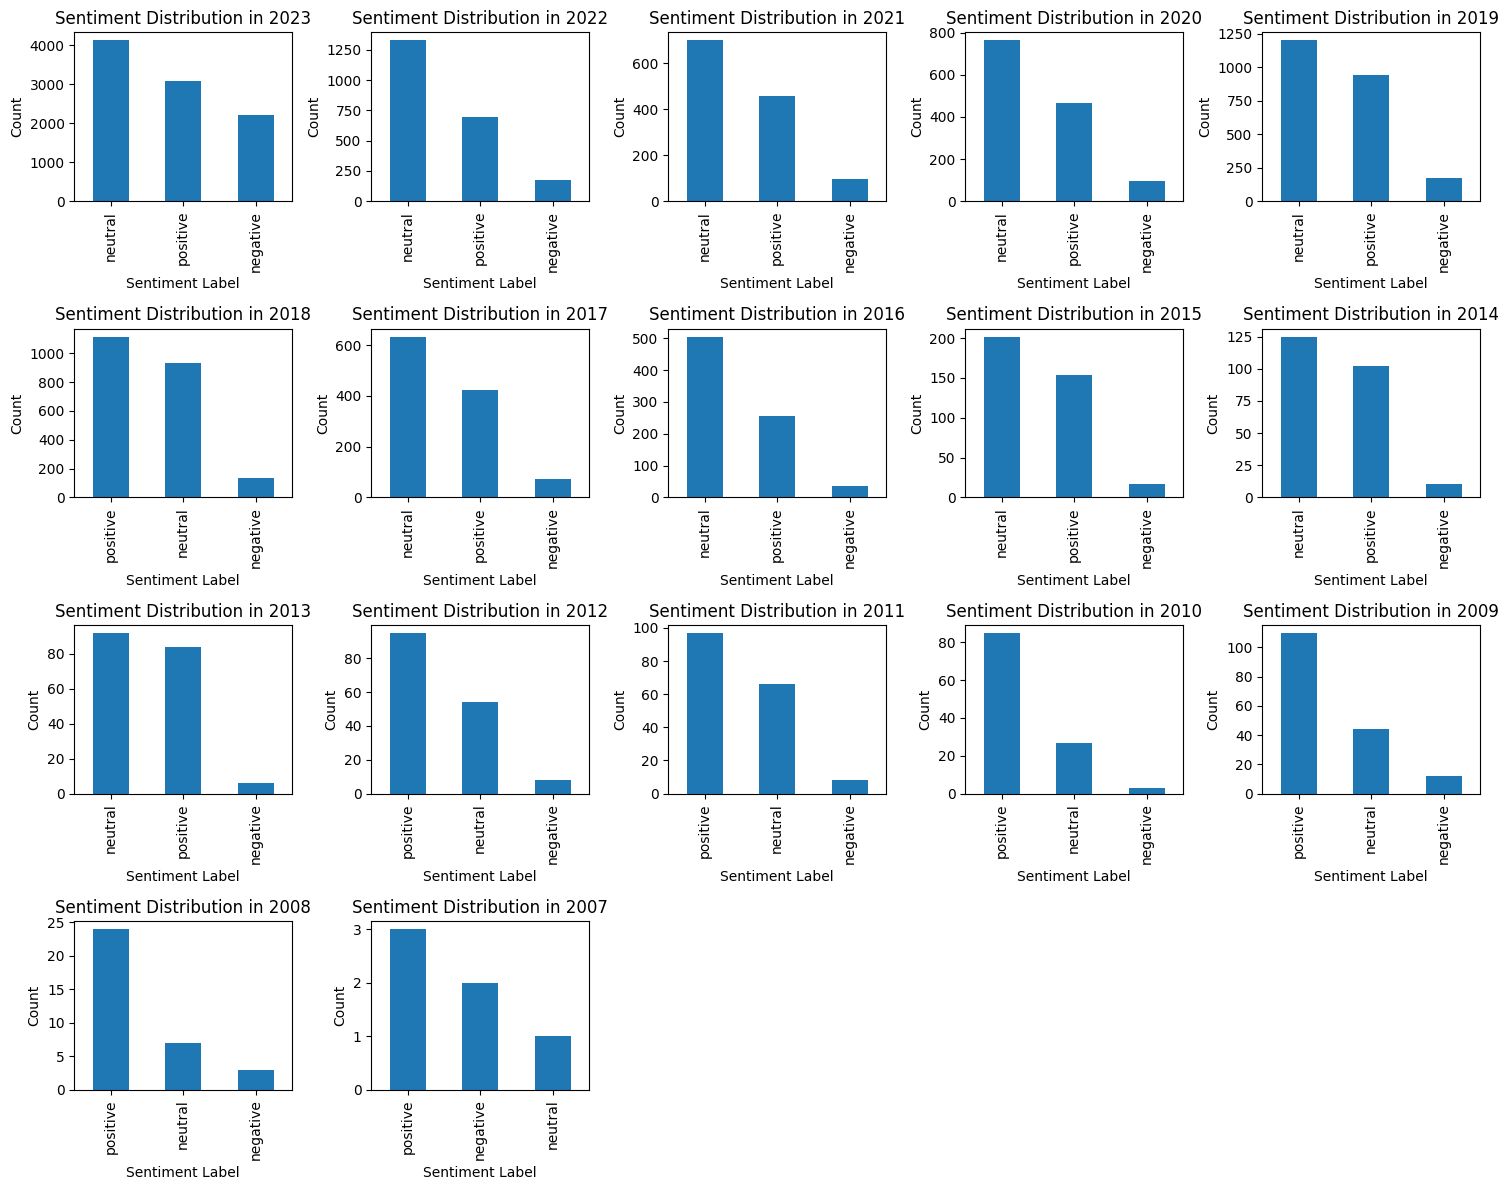

In [ ]:
# Assuming df3 has 'year' and 'naive_bayes_sentiment_label' columns
unique_years = df3['year'].unique()
unique_years = np.sort(unique_years)[::-1]  # Sort years in descending order

# Create subplots for each year in a 4x5 grid
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 12))

# Reshape the axes array to match the 4x5 grid
axes = np.reshape(axes, -1)

for i, year in enumerate(unique_years):
    if i < 20:  # Make sure not to exceed the available subplots
        # Filter data for the current year
        year_data = df3[df3['year'] == year]

        # Plot histogram for sentiment distribution
        ax = axes[i]
        year_data['vader_sentiment_label'].value_counts().plot(kind='bar', ax=ax)
        ax.set_title(f'Sentiment Distribution in {year}')
        ax.set_xlabel('Sentiment Label')
        ax.set_ylabel('Count')

# Remove empty subplots
for i in range(len(unique_years), 20):
    fig.delaxes(axes[i])

# Adjust layout spacing
plt.tight_layout()
plt.show()

<ipython-input-163-43738073d5f4>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df3.corr()


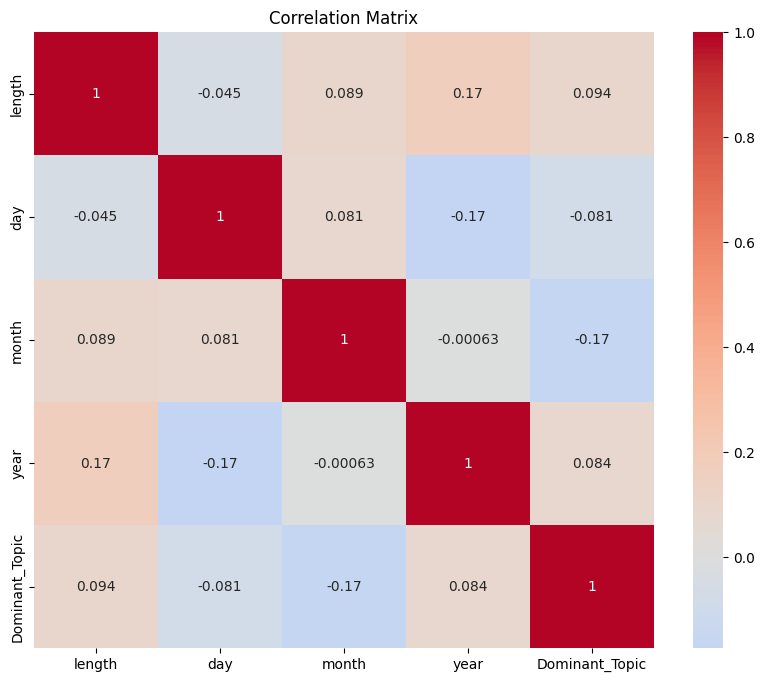

In [ ]:
 import seaborn as sns

 #Calculate the correlation matrix
correlation_matrix = df3.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


WORD CLOUDS

In [ ]:
from wordcloud import WordCloud

In [ ]:
# Remove single quotes from lemmas_BOTH and create lemmas_str
df3['lemmas_str'] = df3['lemmas_BOTH'].str.replace("'", "")

# Display the updated DataFrame
print(df3)

       tweetDate                                            content  \
0     2023-07-28  The Electric Vehicle scam explained \n#Climate...   
1     2023-07-28  This lady was a supporter of Green Energy unti...   
2     2023-07-28  That just about sums it up.\n\n#ClimateScam ht...   
3     2023-07-25               #ClimateScam https://t.co/x0mSnuVUY0   
4     2023-07-25               #ClimateScam https://t.co/3CDsxbYAeO   
...          ...                                                ...   
22043 2011-02-26  Watchdog says electric cars 'are as dirty as d...   
22044 2011-02-15  #ElectricCars gain traction amid push for #sus...   
22045 2011-02-09  #Lithium Drive: #Mercedes and road of sustaina...   
22046 2011-01-15  Just added myself to the http://wefollow.com t...   
22047 2011-01-08  Just added myself to the http://wefollow.com t...   

              Username     label  length  day  month  year  \
0          Kohima_Sean  negative      73   28      7  2023   
1              Bel_B30 

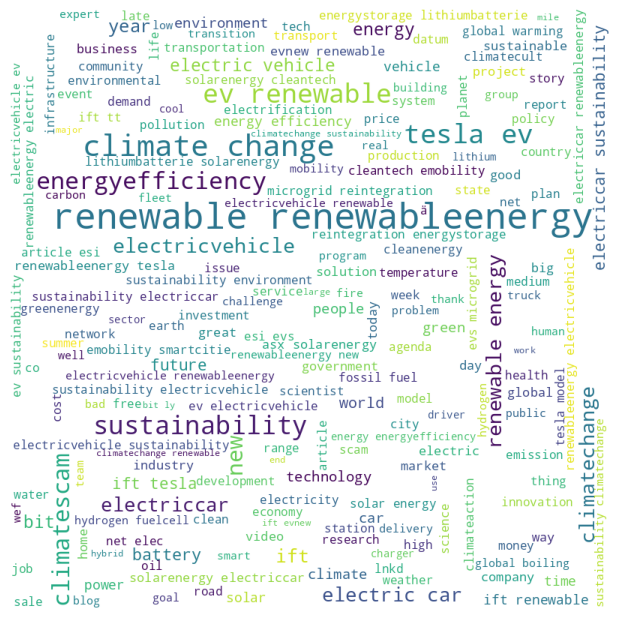

In [ ]:
# Assuming df1 has 'lemmas_str' column
data = df3['lemmas_str']

# Join the lemmatized tweets into a single string
all_text = ' '.join(data)


# Create a WordCloud instance
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(all_text_cleaned)

# Display the word cloud using matplotlib
plt.figure(figsize=(6, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


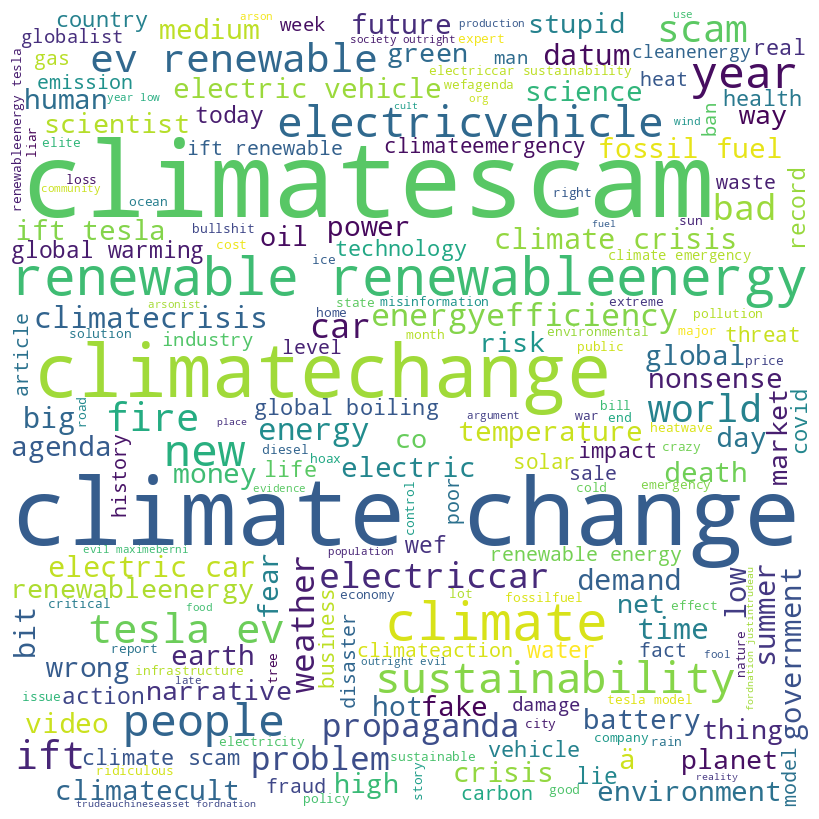

In [ ]:
negative_data = df3[df3['vader_sentiment_label'] == 'negative']['lemmas_str']

# Join the positive lemmatized tweets into a single string
negative_text = ' '.join(negative_data)

# Create a WordCloud instance
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(negative_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

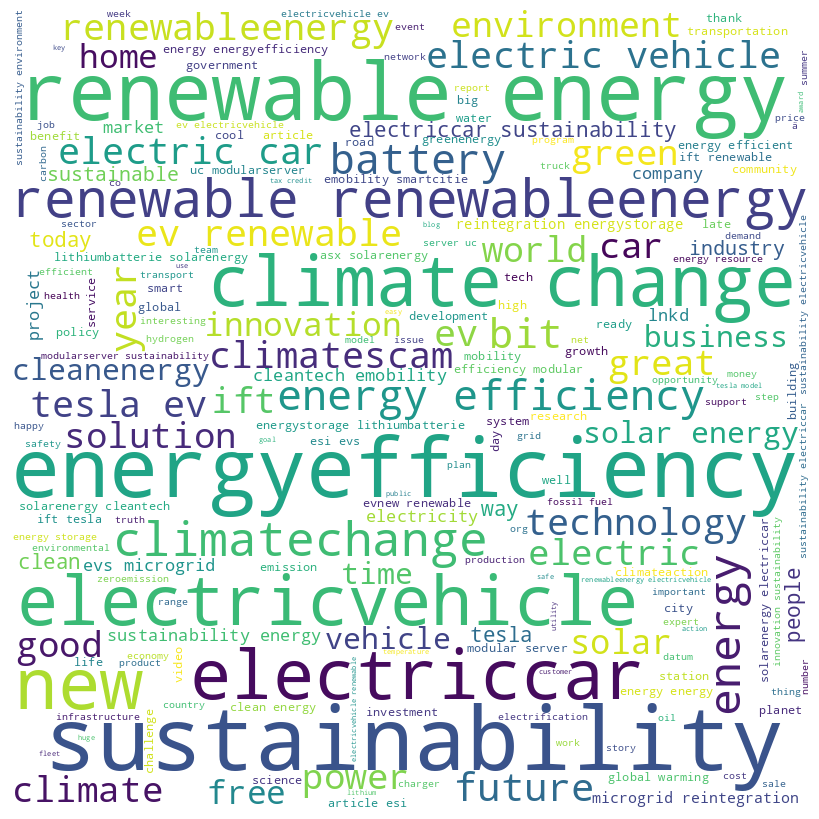

In [ ]:
positive_data = df3[df3['vader_sentiment_label'] == 'positive']['lemmas_str']

# Join the positive lemmatized tweets into a single string
positive_text = ' '.join(positive_data)

# Create a WordCloud instance
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(positive_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


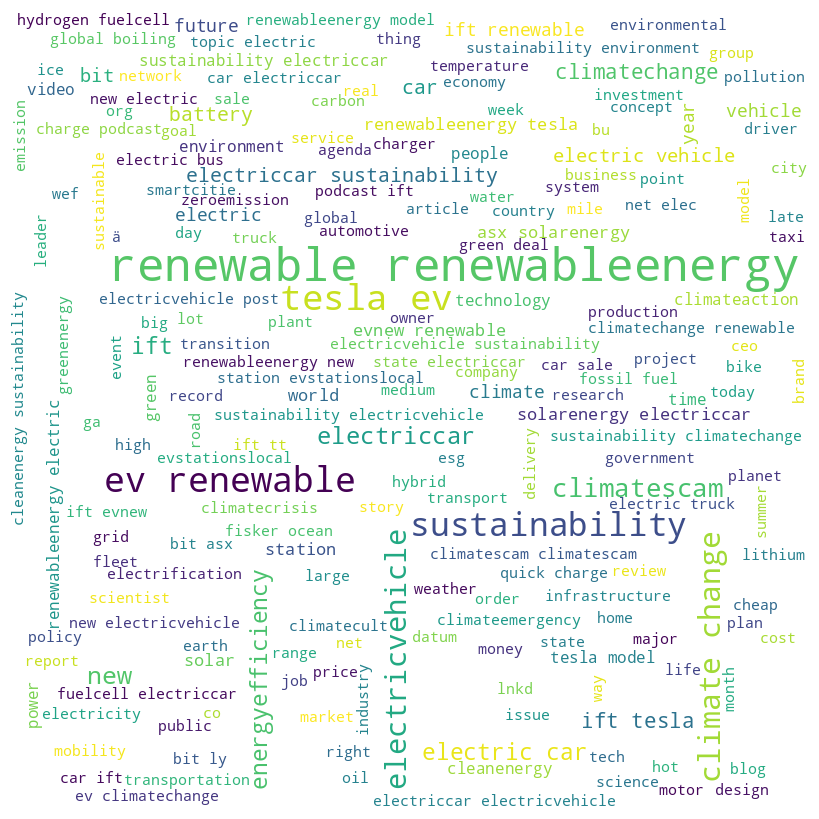

In [ ]:
neutral_data = df3[df3['vader_sentiment_label'] == 'neutral']['lemmas_str']

# Join the positive lemmatized tweets into a single string
neutral_text = ' '.join(neutral_data)

# Create a WordCloud instance
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(neutral_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
